In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

def plot_and_eval(predictions, actual, metric_fmt='{:.2f}', linewidth=4):
    if type(predictions) is not list:
        predictions = [predictions]

    plt.figure(figsize=(16, 8))
    plt.plot(train,label='Train')
    plt.plot(test, label='Test')

    for yhat in predictions:
        mse, rmse = evaluate(actual, yhat, output=False)        
        label = f'{yhat.name}'
        if len(predictions) > 1:
            label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.plot(yhat, label=label, linewidth=linewidth)

    if len(predictions) == 1:
        label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.title(label)

    plt.legend(loc='best')
    plt.show()   

## Acquire 

In [4]:
cols = ['date','time','resource','number1','number2','ip_source']
blob = pd.read_csv('anonymized-curriculum-access.txt', sep=' ', names=cols)

In [5]:
#Cleaning up the time data. 
Date = blob['date'] + ' ' + blob['time']

Date = pd.to_datetime(Date)

blob['Date'] = Date

blob.drop(['date','time'],axis=1,inplace=True)

In [6]:
# df shall be The Dataframe. I'm keeping the nulls
df = blob.set_index('Date')

In [7]:
df.isnull().sum()

resource         0
number1          0
number2      26754
ip_source        0
dtype: int64

In [14]:
# These are the cohorts that have nulls.
# Figure stuff about that later
df[df.number2.isnull()].number1.unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429])

In [54]:
df = df.rename(columns={"number1": "StudentID", "number2": "CohortID"})

## Explore

In [25]:
#     The weekly average is 4158 hits.
df.resample('W')['ip_source'].count().mean()

4158.28125

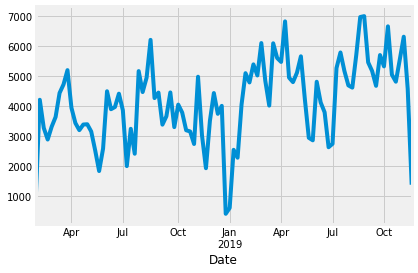

In [23]:
#     The weekly traffic baseline. 
#     January looks like a low point
df.resample('W')['ip_source'].count().plot()
plt.show()

    The monthly traffic baseline. 

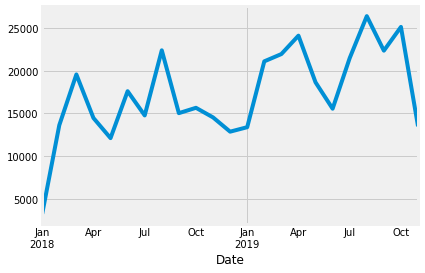

In [24]:
df.resample('M')['ip_source'].count().plot()
plt.show()

In [27]:
#The top ten most common clients' IP address
df.groupby('ip_source').count().sort_values('resource',ascending=False).head(10)
#98.105.18.X is the local router. Most of the others look to be from outside the network

resource  number1  number2
ip_source                                  
97.105.19.58       227220   227220   211289
97.105.19.61        61662    61662    60530
192.171.117.210      8127     8127     7791
70.122.40.62         1338     1338     1338
66.69.108.117        1199     1199     1199
173.174.211.206      1019     1019     1019
108.65.244.91        1007     1007     1007
170.248.173.245       997      997      952
67.11.157.190         972      972      968
66.69.62.219          934      934        0

In [65]:
df[df.ip_source == '192.171.117.210']

resource  \
Date                                                                     
2018-01-26 12:37:53                                                  /   
2018-01-26 12:37:54                           mkdocs/search_index.json   
2018-01-26 12:38:12               content/javascript/objects/math.html   
2018-01-26 12:38:19           content/laravel/quickstart/sessions.html   
2018-01-30 12:44:46                                                  /   
2018-01-30 12:44:58                                        content/git   
2018-01-30 12:44:58             content/git/gitbook/images/favicon.ico   
2018-01-30 12:45:04                                      content/php_i   
2018-01-30 12:45:04           content/php_i/gitbook/images/favicon.ico   
2018-01-30 12:45:07                                     content/php_ii   
2018-01-30 12:45:07          content/php_ii/gitbook/images/favicon.ico   
2018-01-30 12:45:20                                    content/php_iii   
2018-01-30 12:45:20         content/php_iii/gitbook/images/favicon.ico   
2018-01-30 12:45:24                      content/php_iii/php-with-html   
2018-01-30 12:45:24  content/php_iii/php-with-html/gitbook/images/f...   
2018-01-30 12:45:28                                     content/php_iv   
2018-01-30 12:45:28          content/php_iv/gitbook/images/favicon.ico   
2018-01-30 12:45:31                      content/php_iv/php-with-mysql   
2018-01-30 12:45:31  content/php_iv/php-with-mysql/gitbook/images/f...   
2018-01-30 12:45:33   content/php_iv/php-with-mysql/connect-to-db.html   
2018-01-30 12:45:42              content/php_iv/classes-and-objects-ii   
2018-01-30 12:45:42  content/php_iv/classes-and-objects-ii/gitbook/...   
2018-01-30 12:45:45  content/php_iv/classes-and-objects-ii/inherita...   
2018-01-30 12:45:47                           content/php_iv/ad-lister   
2018-01-30 12:45:47  content/php_iv/ad-lister/gitbook/images/favico...   
2018-01-30 12:45:50                              content/laravel/intro   
2018-01-30 12:45:50   content/laravel/intro/gitbook/images/favicon.ico   
2018-01-30 12:55:49             content/laravel/intro/environment.html   
2018-01-30 12:55:56                              content/laravel/intro   
2018-01-30 13:07:27                              content/laravel/intro   
...                                                                ...   
2019-11-17 12:20:36        html-css/css-i/flexbox/flexbox-fundamentals   
2019-11-17 12:24:19         html-css/css-i/flexbox/flexbox-in-practice   
2019-11-17 12:26:17                 html-css/css-i/grid/css-grid-intro   
2019-11-17 12:27:16          html-css/css-i/grid/css-grid-fundamentals   
2019-11-17 12:27:38           html-css/css-i/grid/css-grid-in-practice   
2019-11-17 12:48:58                                    html-css/css-ii   
2019-11-17 13:04:01                      html-css/css-ii/media-queries   
2019-11-17 13:19:09          html-css/css-i/grid/css-grid-fundamentals   
2019-11-17 13:30:48                           search/search_index.json   
2019-11-17 13:30:54                                  javascript-ii/npm   
2019-11-17 13:43:19             html-css/css-ii/bootstrap-introduction   
2019-11-17 13:43:21                      html-css/css-ii/media-queries   
2019-11-17 13:43:26                      html-css/css-ii/media-queries   
2019-11-17 13:49:21                    examples/css/media-queries.html   
2019-11-17 16:39:07                        html-css/css-i/introduction   
2019-11-17 16:39:10                           search/search_index.json   
2019-11-17 16:39:33             html-css/css-ii/bootstrap-introduction   
2019-11-17 17:43:00                             9-timeseries/2-acquire   
2019-11-17 18:02:21                                                  /   
2019-11-17 18:04:34                             9-timeseries/4-explore   
2019-11-17 18:04:44                                9-timeseries/3-prep   
2019-11-17 18:39:18                           search/search_index.

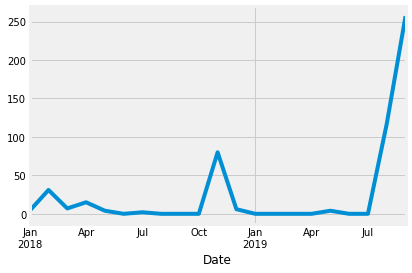

In [68]:
df[df.StudentID == 37].resource.resample('M').count().plot()

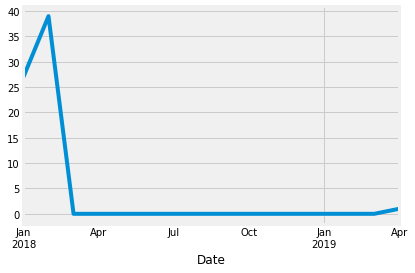

In [69]:
df[df.StudentID == 69].resource.resample('M').count().plot()

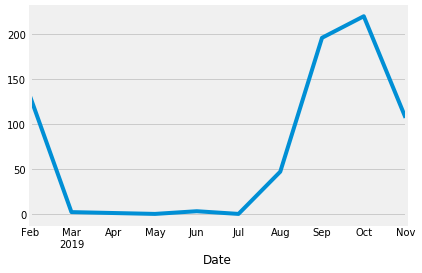

In [70]:
df[df.StudentID == 358].resource.resample('M').count().plot()

### Inside and Outside Traffic 

In [32]:
# Lets look at the local traffic so nobody gets hurt.
local_traffic = df[(df.ip_source == '97.105.19.58') | (df.ip_source == '97.105.19.61')]

In [34]:
global_traffic = df[(df.ip_source != '97.105.19.58') | (df.ip_source != '97.105.19.61')]

In [35]:
local_traffic.shape

(288882, 4)

In [36]:
global_traffic.shape

(399195, 4)

<function matplotlib.pyplot.show(*args, **kw)>

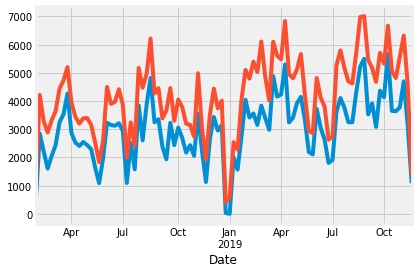

In [42]:
local_traffic.resample('W').resource.count().plot()
global_traffic.resample('W').resource.count().plot()
plt.show

#### Recent Cohort Analysis

#### First Cohort Analysis

In [43]:
first_cohort = df[df.number2 == 1]

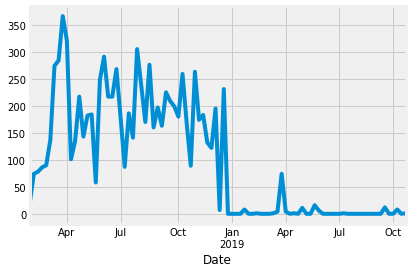

In [46]:
first_cohort.resample('W').resource.count().plot()
plt.show()
#This looks big, but look at the scale. Tops out at 350. There were at most 350 hits for the URLs
#From this probable first cohort

#### Bayes

In [47]:
bayes = df[df.number2 == 34]

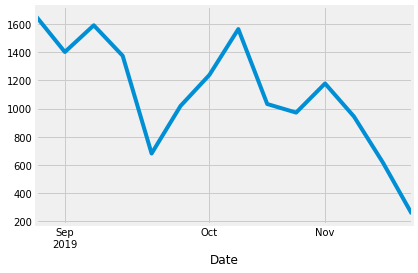

In [49]:
bayes.resample('W').resource.count().plot()
plt.show()

In [51]:
for i in df.number2:
    print(i)

8.0
8.0
8.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
1.0
1.0
22.0
1.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
16.0
16.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
22.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
18.0
18.0
21.0
21.0
18.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
22.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
1.0
22.0
1.0
22.0
22.0
1.0
22.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
21.0
21.0
21.0
22.0
22.0
22.0
21.0
19.0
19.0
19.0
19.0
21.0

21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
21.0
21.0
22.0
22.0
22.0
21.0
22.0
22.0
nan
22.0
nan
21.0
21.0
21.0
21.0
21.0
21.0
nan
nan
nan
14.0
14.0
22.0
22.0
22.0
22.0
22.0
nan
22.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
22.0
21.0
21.0
21.0
21.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
22.0
22.0
21.0
21.0
21.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
22.0
22.0
22.0
16.0
16.0
16.0
16.0
21.0
21.0
22.0
nan
nan
22.0
22.0
21.0
21.0
7.0
7.0
7.0
7.0
7.0
7.0
21.0
7.0
7.0
21.0
7.0
7.0
21.0
21.0
21.0
21.0
21.0
22.0
21.0
14.0
21.0
21.0
21.0
21.0
21.0
14.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
nan
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
14.0
14.0
14.0
22.0
21.0
21.0
22.0
22.0
22.0
14.0
14.0
14.0
21.0
14.0
14.0
22.0
nan
nan
nan
22.0
22.0
22.0
13.0
13.0
nan
nan
nan
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
21.0
21.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
21.0
22.0
21.0
22.0
22.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
16.0
16.0
16.0
16.0
16.0
16.0
22.0
21.0
21.0
22.0
21.0
16.0
16.0
16.0
16.0
22.0
16.0
22.0
22.0
16.0
16.0
16.0
21.0
16.0
21.0
21.0
21.0
16.0
22.0
16.0
16.0
22.0
16.0
16.0
16.0
16.0
21.0
21.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
1.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0

22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
14.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
14.0
14.0
14.0
14.0
22.0
22.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
nan
nan
nan
nan
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
13.0
8.0
8.0
nan
nan
nan
14.0
22.0
21.0
14.0
nan
nan
n

13.0
13.0
13.0
13.0
22.0
22.0
15.0
15.0
15.0
15.0
15.0
15.0
15.0
15.0
nan
nan
nan
nan
nan
nan
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
22.0
22.0
22.0
14.0
14.0
14.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
8.0
8.0
8.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
8.0
8.0
8.0
22.0
22.0
22.0
22.0
8.0
22.0
22.0
22.0
8.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
22.0
8.0
8.0
8.0
8.0
22.0
22.0
22.0
22.0
22.0

22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
nan
nan
nan
22.0
22.0
22.0
nan
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
nan
21.0
21.0
21.0
22.0
18.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
21.0
21.0
22.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
21.0
21.0
22.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
21.0
21.0
22.0
21.0
21.0
22.0
22.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
18.0
18.0
18.0
18.0
nan
18.0
nan
nan
nan
21.0
21.0
21.0
21.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
14.0
14.0
22.0
14.0
22.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
22.0
22.0


1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
8.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
14.0
14.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
1.0
1.0
1.0
22.0
1.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
14.0
22.0
22.0
22.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
14.0
22.0
22.0
22.0
22.0
14.0
14.0
22.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.

14.0
14.0
22.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
22.0
22.0
22.0
14.0
14.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
14.0
14.0
22.0
22.0
22.0
22.0
nan
nan
nan
nan
nan
21.0
21.0
21.0
14.0
14.0
14.0
14.0
14.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
21.0
21.0
14.0
14.0
14.0
14.0
22.0
22.0


19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
1.0
22.0
22.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
22.0
22.0
22.0
1.0
1.0
1.0
1.0
1.0
22.0
21.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
19.0
22.0
22.0
22.0
22.0
22.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
nan
nan
nan
nan
22.0
22.0
22.0
14.0
21.0
19.0
19.0
19.0
22.0
22.0
22.0
23.0
23.0
23.0
13.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0

23.0
23.0
18.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
nan
nan
nan
21.0
21.0
21.0
21.0
21.0
21.0
21.0
nan
nan
nan
nan
21.0
21.0
23.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
nan
nan
23.0
23.0
23.0
22.0
22.0
13.0
23.0
23.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
21.0
21.0
21.0
21.0
21.0
1.0
1.0
22.0
22.0
21.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
21.0
21.0
23.0
23.0
8.0
23.0
23.0
23.0
8.0
8.0
22.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
22.0
22.0
22.0
22.0
14.0
14.0
14.0
14.0
14.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
21.0
21.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22

23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
14.0
14.0
14.0
14.0
22.0
23.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
18.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
18.0
18.0
18.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
22.0
22.0
22.0
1.0
1.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
1.0
1.0
1.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
1.0
23.0
22.0
1.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0


23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
18.0
18.0
23.0
nan
23.0
nan
nan
23.0
nan
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
23.0
21.0
1.0
1.0
1.0
1.0
1.0
1.0
23.0
23.0
23.0
22.0
22.0
22.0
23.0
1.0
1.0
23.0
23.0
23.0
22.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
23.0
14.0
23.0
23.0
14.0
22.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
1.0
1.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
14.0
14.0
23.0
1.0
21.0
23.0
14.0
23.0
14.0
22.0
23.0
23.0
14.0
14.0
23.0
14.0
14.0
23.0
22.0
22.0
22.0
22.0
22.0
21.0
14.0
14.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
22.

14.0
14.0
23.0
23.0
23.0
23.0
14.0
23.0
14.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
22.0
22.0
8.0
8.0
8.0
8.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
14.0
14.0
14.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
23.0
22.0
14.0
14.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
8.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.

nan
nan
14.0
14.0
14.0
22.0
22.0
22.0
14.0
23.0
23.0
23.0
nan
22.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
14.0
1.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
nan
1.0
1.0
1.0
1.0
1.0
23.0
22.0
23.0
23.0
23.0
22.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
nan
nan
nan
nan
nan
nan
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
nan
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
23.0
nan
22.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
13.0
22.0
22.0
22.0

22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
21.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
23.0
22.0
18.0
23.0
23.0
23.0
23.0
23.0
8.0
8.0
8.0
8.0
8.0
23.0
23.0
22.0
22.0
22.0
14.0
14.0
23.0
1.0
22.0
22.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
22.0
23.0
22.0
22.0
22.0
21.0
22.0
21.0
21.0
22.0
21.0
22.0
22.0
22.0
21.0
21.0
23.0
23.0
22.0
22.0
23.0
1.0
23.0
14.0
14.0
14.0
14.0
23.0
22.0
23.0
14.0
14.0
14.0
14.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
21.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
21.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
1.0
23.0
8.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
8.0
14.0
22.0
22.0
8.0
8.0
22.0
23.0
23.0
22.0
23.0
22.0
22.0
22.0
22.0
16.0
21.0
21.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0


nan
nan
23.0
23.0
23.0
23.0
23.0
23.0
nan
nan
nan
22.0
22.0
22.0
22.0
nan
nan
nan
nan
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
8.0
8.0
8.0
8.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
14.0
14.0
14.0
14.0
14.0
23.0
23.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
23.0
1.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
21.0
21.0
23.0
23.0
23.0
22.0
22.0
22.0
18.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
23.0
23.0
23.0
14.0
14.0
22.0
22.0
21.0
21.0
21.0
21.0
21.0
21.0
1.0
23.0
1.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
14.0
22.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
23.0


23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
nan
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
21.0
21.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
14.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
2

14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
1.0
1.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
23.0
22.0
22.0
22.0
19.0
22.0
19.0
19.0
19.0
22.0
19.0
19.0
22.0
22.0
22.0
19.0
19.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
18.0
21.0
21.0
23.0
23.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
22.0
22.0
22.0
22.0
22.0
22.0
13.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
22.0
23.0
23.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
23.

22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
13.0
nan
22.0
22.0
22.0
22.0
22.0
1.0
1.0
1.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
nan
23.0
23.0
23.0
23.0
23.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
22.0
23.0
23.0
14.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
1.0
22.0
1.0
1.0
22.0
22.0
23.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
14.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
23.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
22.0
23.0
23.0
22.0
23.0
23.0
22.0
22.0
23.0
22.0
23.0
22.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23

22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
1.0
1.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
23.0
22.0
22.0
23.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
22.0
14.0
23.0
14.0
14.0
23.0
23.0
23.0
23.0
1.0
23.0
1.0
23.0
1.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
nan
23.0
23.0
23.0
19.0
19.0
19.0
19.0
19.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
23.0
23.0
22.0
23.0
21.0
21.0
nan
22.0
21.0
21.0
21.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
1.0
1.0
1.0
1.0
1.0
23.0
23.0
1.0
1.0
1.0
1.0
23.0
22.0
22.0
23.0
23.0
19.0
23.0
19.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
nan
nan
nan
nan
nan
23.0
22.0

23.0
1.0
1.0
1.0
1.0
22.0
22.0
22.0
1.0
23.0
23.0
1.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
1.0
23.0
23.0
23.0
23.0
1.0
23.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
22.0
22.0
23.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
22.0
1.0
1.0
1.0
1.0
1.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
22.0
23.0
23.0
23.0
23.0
8.0
23.0
23.0
23.0
23.0
14.0
14.0
22.0
22.0
22.0
23.0
22.0
14.0
14.0
14.0
14.0
23.0
23.0
23.0
23.0
2

22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
23.0
8.0
8.0
8.0
8.0
8.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
8.0
8.0
8.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
13.0
13.0
13.0
13.0
13.0
13.0
22.0
13.0
22.0
22.0
13.0
13.0
13.0
13.0
13.0
1.0
1.0
nan
nan
nan
nan
nan
nan
nan
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
22.0
23.0
22.0
22.0
23.0
23.0
14.0
14.0
14.0
23.0
23.0
22.0
22.0
13.0
13.0
13.0
21.0
21.0
21.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
1.0
22.0
1.0
22.0
22.0
22.0
22.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0

23.0
22.0
22.0
22.0
22.0
23.0
23.0
1.0
1.0
1.0
1.0
1.0
1.0
23.0
nan
nan
22.0
22.0
23.0
23.0
nan
nan
nan
nan
nan
nan
nan
23.0
nan
14.0
nan
nan
22.0
22.0
1.0
1.0
23.0
23.0
23.0
nan
nan
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
1.0
23.0
23.0
23.0
23.0
23.0
nan
nan
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
nan
nan
nan
7.0
22.0
22.0
nan
22.0
22.0
nan
nan
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
nan
nan
21.0
21.0
21.0
22.0
22.0
21.0
21.0
21.0
21.0
nan
23.0
21.0
21.0
21.0
21.0
21.0
21.0
23.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
23.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
22.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
8

23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
nan
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
14.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
14.0
23.0
23.0
23.0
14.0
14.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
22.0
23.0
23.0
2

23.0
21.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
21.0
21.0
22.0
23.0
nan
nan
nan
21.0
21.0
21.0
21.0
21.0
23.0
nan
nan
nan
nan
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
13.0
21.0
21.0
21.0
21.0
21.0
23.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
23.0
23.0
23.0
23.0
21.0
21.0
23.0
23.0
23.0
21.0
21.0
21.0
21.0
14.0
14.0
14.0
14.0
14.0
14.0
23.0
23.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
14.0
23.0
23.0
23.0
23.0
21.0
21.0
21.0
21.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
21.0
21.0
23.0
23.0
1.0
1.0
1.0
23.0
23.0
23.0
23.0
21.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0


23.0
23.0
23.0
23.0
24.0
23.0
23.0
23.0
23.0
24.0
23.0
24.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
8.0
8.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
24.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
nan
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
23.0
1.0
1.0
23.0
23.0
23.0
23.0
23.0
24.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
8.0
8.0
24.0
1.0
23.0
8.0
8.0
23.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
24.0
24.0
23.0
23.0
23.0
23.0
8.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
nan
24.0
nan
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
nan
23.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
23.0
1.0
1.0
1.0
1.0
1.0
1.0
23.0
23.0
24.0
24.0
24.0
8.0
8.0
8.0
8.0
24.0
24.0
23.0
24.0
24.0
23.0
8.0
8.0
24.0
23.0
23.0
23.0
1.0
1.0
23.0
24.0
24.0
23.0
23.0
24.0
1.0
24

8.0
23.0
23.0
8.0
8.0
8.0
8.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
8.0
24.0
24.0
24.0
8.0
8.0
8.0
24.0
24.0
24.0
23.0
24.0
24.0
23.0
24.0
23.0
23.0
24.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
24.0
23.0
24.0
23.0
23.0
8.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
1.0
1.0
1.0
22.0
22.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
22.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
23.0
23.0
23.0
24.0
1.0
24.0
24.0
24.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
23.0
23.0
24.0
23.0
23.0
24.0
24.0

1.0
1.0
23.0
24.0
1.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
8.0
8.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
23.0
24.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
1.0
1.0
1.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
23.0
24.0
24.0
23.0
23.0
1.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
19.0
19.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
19.0
24.0
24.0
23.0
24.0
24.0
24.0

23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
13.0
21.0
24.0
24.0
24.0
nan
nan
nan
nan
nan
nan
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.

24.0
24.0
24.0
24.0
24.0
1.0
1.0
23.0
24.0
23.0
23.0
23.0
23.0
24.0
1.0
1.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
16.0
16.0
16.0
23.0
23.0
23.0
23.0
24.0
14.0
24.0
1.0
1.0
23.0
1.0
23.0
23.0
23.0
24.0
14.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
14.0
23.0
23.0
24.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
22.0
22.0
22.0
22.0
1.0
24.0
22.0
22.0
24.0
1.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
23.0
23.0
23.0
1.0
1.0
1.0
1.0
1.0
1.0
23.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
1.0
24.0
1.0
1.0
8.0
16.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
24.0
23.0
23.0
24.0
24.0
24.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
24.0
23.0
23.0
23.0
23.0
23.0
1.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
24.0
nan
nan
nan
24.0
23.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
23.0
23.0
23.0
23.0
23.0
24.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
13.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
23.0
23.0
23.0
nan
nan
23.0
23.0
23.0
nan
nan
nan
nan
nan
nan
nan
24.0
nan
nan
23.0
23.0
23.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
24.0
24.0
24.0
24.0
22.0

24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
1.0
1.0
23.0
23.0
1.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
nan
nan
nan
24.0
24.0
24.0
24.0
nan
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
21.0
21.0
nan
24.0
24.0
nan
nan
24.0
24.0
23.0
23.0
23.0
24.0
24.0
24.0
1.0
nan
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
nan
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0


24.0
24.0
24.0
14.0
14.0
14.0
21.0
24.0
21.0
23.0
23.0
21.0
21.0
21.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
22.0
24.0
24.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
22.0
24.0
22.0
24.0
24.0
24.0
24.0
24.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
nan
23.0
24.0
24.0
24.0
24.0
24.0
8.0
8.0
8.0
22.0
24.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
24.0
22.0
23.0
23.0
23.0
22.0
22.0
24.0
23.0
24.0
23.0
24.0
24.0
14.0
14.0
1.0
14.0
14.0
14.0
24.0
24.0
24.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
24.0
24.0
24.0
8.0
8.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
8.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
14.0
24.0
24.0
24.0
24.0
nan
23.0
23.0
23.0
nan
nan
24.0
24.0
24.0
24.0
24.0
nan
nan
24.0
nan
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
22.0
22.0
22.0
24.0
22.0
24.0
22.0
22.0
22.0
22.0
24.0
22.0
22.0
22.0
22.0
22.0
22.0
24.0
22.0
24.

24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
23.0
24.0
24.0
24.0
23.0
23.0
23.0
1.0
1.0
1.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
14.0
23.0
23.0
23.0
23.0
23.0
23

23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
22.0
22.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
15.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
13.0
13.0
24.0
13.0
24.0
24.0
23.0
23.0
23.0
13.0
24.0
13.0
13.0
14.0
14.0
14.0
14.0
8.0
8.0
14.0
14.0
23.0
23.0
23.0
23.0
23.0
24.0
24.0
24.0
23.0
23.0
23.0
24.0
23.0
23.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
13.0
23.0
1.0
1.0
1.0
1.0
14.0
1.0
23.0
24.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
24.0
24.0
24.0
24.0
24.0
24

24.0
24.0
24.0
14.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
14.0
14.0
14.0
14.0
14.0
22.0
22.0
22.0
22.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
23.0
24.0
23.0
23.0
23.0
24.0
24.0
23.0
23.0
1.0
1.0
14.0
24.0
24.0
24.0
17.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
18.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
22.0
22.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
24.0
23.0
23.0
23.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0

25.0
25.0
25.0
25.0
21.0
22.0
22.0
25.0
25.0
25.0
25.0
22.0
22.0
22.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
1.0
24.0
24.0
24.0
24.0
1.0
1.0
24.0
1.0
24.0
25.0
25.0
24.0
24.0
1.0
24.0
24.0
25.0
25.0
nan
nan
25.0
25.0
nan
24.0
25.0
25.0
1.0
1.0
1.0
25.0
24.0
25.0
25.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
14.0
14.0
14.0
24.0
24.0
24.0
25.0
25.0
22.0
22.0
22.0
24.0
24.0
1.0
24.0
14.0
25.0
25.0
25.0
22.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
1.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
14.0
14.0
14.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24

24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
1.0
1.0
1.0
25.0
25.0
25.0
25.0
25.0
1.0
25.0
25.0
24.0
24.0
24.0
25.0
24.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
2

25.0
25.0
24.0
25.0
25.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
25.0
25.0
25.0
25.0
25.0
24.0
1.0
1.0
1.0
24.0
24.0
24.0
14.0
24.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
24.0
1.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
1.0
25.0
1.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
8.0
8.0
8.0
8.0
8.0
24.0
8.0
1.0
8.0
1.0
24.0
8.0
1.0
8.0
1.0
1.0
1.0
1.0
1.0
24.0
1.0
1.0
1.0
24.0
24.0
24.0
25.0
2

25.0
14.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
14.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
1.0
1.0
1.0
1.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
25.0
24.0
24.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
1.0
1.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
23.0
23.0
23.0
25.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
25.0
25.0
24.0
24.0
25.0
24.0
25.0
25.0
24.0
24.0
21.0
8.0
8.0
25.0
25.0
8.0
8.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
1.0
1.0
1.

24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
24.0
25.0
24.0
25.0
25.0
24.0
24.0
1.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
1.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
1.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
14.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
nan
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
21.0
25.0
25.0
25.0
24.0
24.0
1.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
1.0
25.0
25.0
1.0
25.0
25.0
25.0
25.0

25.0
25.0
25.0
25.0
25.0
25.0
24.0
1.0
25.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
23.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
8.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
8.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
8.0
24.0
8.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
8.0
24.0
24.0
24.0
24.0
25.0
24.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.

24.0
24.0
24.0
24.0
21.0
14.0
25.0
25.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
14.0
14.0
14.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
nan
1.0
22.0
25.0
25.0
23.0
23.0
23.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
16.0
25.0
16.0
16.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.

24.0
14.0
nan
24.0
24.0
22.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
14.0
14.0
14.0
14.0
14.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
1.0
1.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
22.0
22.0
22.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0


24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
13.0
16.0
16.0
16.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
23.0
25.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0


25.0
24.0
24.0
24.0
24.0
24.0
13.0
24.0
24.0
24.0
13.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
13.0
13.0
25.0
24.0
24.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
16.0
13.0
16.0
16.0
13.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
25.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
25.0
24.0
25.0
24.0
25.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
21.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
nan
nan
nan
nan
nan
24.0
24.0
24.0
15.0
15.0
15.0
15.0
24.0
22.0
22.0
22.0
22.0
19.0
24.0
24.0
24.0
24.0
2

24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
1.0
25.0
25.0
25.0
1.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
14.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
25.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
1.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
25.0
24.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
1.0
1.0
1.0
25.0
24.0
25.0
25.0
2

24.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
25.0
25.0
25.0
25.0
25.0
25.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
1.0
1.0
19.0
19.0
19.0
24.0
25.0
25.0
25.0
19.0
19.0
19.0
19.0
19.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
13.0
1.0
1.0
1.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
8.0
8.0
8.0
8.0
8.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
2

25.0
25.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
1.0
24.0
25.0
24.0
25.0
24.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
1.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
16.0
16.0
16.0
16.0
16.0
24.0
24.0
24.0
25.0
25.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
14.0
24.0
14.0
24.0
24.0
14.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
14.0
14.0
14.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
8.0
8.0
8.0
8.0
8.0
15.0
15.0
15.0
15.0
15.0
24.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
24.0
24.

24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
1.0
25.0
25.0
25.0
25.0
1.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
1.0
1.0
1.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
25.0
25.0
1.0
1.0
1.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
14.0
24.0
24.0
24.0
24.0
25.0
25.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
14.0
14.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
23.0
24.0
25.0
24.0
25.0
24.0
24.0
24.0
24.0
24.0
25.

22.0
22.0
22.0
22.0
22.0
23.0
23.0
23.0
1.0
1.0
1.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
23.0
23.0
23.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
1.0
1.0
1.0
1.0
1.0
25.0
24.0
24.0
25.0
24.0
25.0
25.0
25.0
1.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
8.0
8.0
8.0
8.0
8.0
1.0
25.0
25.0
25.0
24.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
24.0
24.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
1.0
1.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
2

24.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
1.0
1.0
25.0
1.0
1.0
1.0
1.0
25.0
26.0
nan
nan
nan
nan
nan
nan
nan
25.0
24.0
25.0
23.0
23.0
23.0
23.0
14.0
14.0
14.0
25.0
25.0
25.0
1.0
1.0
1.0
24.0
24.0
1.0
25.0
24.0
24.0
1.0
1.0
1.0
25.0
25.0
25.0
26.0
23.0
23.0
23.0
23.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
23.0
23.0
23.0
25.0
25.0
25.0
23.0
23.0
26.0
26.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
26.0
25.0
14.0
14.0
14.0
nan
23.0
nan
nan
nan
nan
22.0
22.0
24.0
24.0
24.0
22.0
24.0
22.0
24.0
22.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
24.0
24.0
24.0
23.0
21.0
21.0
21.0
21.0
26.0
25.0
23.0
23.0
26.0
18.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
26.0
26.0
26.0
26.0
1.0
26.0
26.0
26.0
1.0
25.0
25.0
25.0
25.0
25.0
26.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
1.0
1.0
1.0
1.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
25.0
26.0
1.0
1.0
1.0
26.0
26.0
26.0
2

25.0
1.0
25.0
1.0
1.0
25.0
1.0
1.0
24.0
24.0
1.0
25.0
25.0
23.0
25.0
25.0
25.0
25.0
25.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
24.0
22.0
22.0
22.0
22.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
1.0
14.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
14.0
26.0
26.0
26.0
25.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
14.0
14.0
14.0
14.0
26.0
14.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
25.0
22.0
24.0
24.0
24.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
26.0
25.0
26.0
26.0
25.0
25.0
1.0
1.0
1.0
1.0
1.0
1.0
25.0
25.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
26.0
26.0
25.0
25.0
25.0
24.0
24.0
26.0
26.0
25.0
25.0
1.0
1.0
26.0
26.0
26.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
26.0
25.0
26.0
24.0
24.0
24.0
25.0
25.0
25.0
26.0
25.

24.0
25.0
1.0
25.0
14.0
14.0
14.0
25.0
14.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
22.0
22.0
22.0
25.0
25.0
26.0
26.0
26.0
26.0
25.0
26.0
25.0
25.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
22.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
22.0
22.0
22.0
26.0
22.0
22.0
26.0
25.0
25.0
26.0
24.0
26.0
26.0
23.0
1.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
24.0
26.0
14.0
14.0
24.0
24.0
24.0
26.0
24.0
24.0
26.0
26.0
26.0
14.0
14.0
26.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
25.0
25.0
26.0
26.0
1.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
1.0
1.0
1.0
1.0
26.0
25.0
26.0
24.0
26.0
26.0
26.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
26.0
26.0
1.0
1.0
1.0
26.0
26.0
26.0
1.0
26.0
26.0
24.0
24.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
25.0
25.0
24.0
24.0
24.

25.0
25.0
7.0
7.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
25.0
26.0
25.0
25.0
7.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
25.0
7.0
26.0
26.0
25.0
7.0
26.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
25.0
7.0
1.0
1.0
1.0
1.0
26.0
25.0
25.0
25.0
1.0
7.0
1.0
1.0
26.0
25.0
25.0
25.0
25.0
25.0
26.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
25.0
25.0
26.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
26.0
26.0
25.0
25.0
25.0
25.0
1.0
1.0
25.0
1.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
7.0
25.0
7.0
7.0
7.0
7.0
7.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
1.0
1.0
25.0
1.0
25.0
25.0
25.0
25.0
25.0
25.0
7.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
25.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.

25.0
25.0
25.0
26.0
25.0
25.0
25.0
25.0
23.0
25.0
23.0
23.0
23.0
25.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
22.0
22.0
22.0
22.0
22.0
22.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
13.0
13.0
13.0
25.0
25.0
25.0
25.0
25.0
26.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
nan
nan
nan
nan
nan
nan
25.0
25.0
25.0
25.0
25.0
13.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
25.0
25

25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
18.0
18.0
26.0
25.0
18.0
18.0
25.0
18.0
18.0
18.0
18.0
18.0
18.0
25.0
26.0
26.0
25.0
26.0
26.0
26.0
26.0
26.0
25.0
18.0
26.0
26.0
25.0
26.0
26.0
25.0
25.0
25.0
26.0
25.0
25.0
25.0
26.0
26.0
26.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
1.0
1.0
26.0
25.0
26.0
25.0
25.0
26.0
26.0
25.0
25.0
25.0
25.0
1.0
1.0
1.0
1.0
25.0
26.0
26.0
26.0
26.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
14.0
14.0
14.0
14.0
26.0
25.0
14.0
14.0
14.0
14.0
14.0
26.0
26.0
26.0
14.0
14.0
14.0
1.0
1.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
26.0
26.0
17.0
17.0
26.0
17.0
17.0
17.0
17.0
25.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
26.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
26.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
2

25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
25.0
26.0
26.0
26.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
1.0
25.0
25.0
1.0
1.0
25.0
25.0
1.0
25.0
25.0
25.0
25.0
1.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
25.0
1.0
25.0
26.0
25.0
1.0
25.0
24.0
24.0
24.0
25.0
24.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
14.0
14.0
14.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
25.0
1.0
25.0
25.

26.0
26.0
26.0
26.0
26.0
22.0
22.0
26.0
26.0
22.0
22.0
22.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
22.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
24.0
24.0
26.0
26.0
26.0
26.0
25.0
25.0
22.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
24.0
25.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
25.0
25.0
25.0
25.0
25.0
24.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
1.0
1.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
21.0
21.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
1.0
1.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
1.0
1.0
1.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
26.0
1.0
1.0
26.0
26.0
26.0


26.0
26.0
26.0
26.0
14.0
26.0
26.0
14.0
14.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
13.0
25.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
22.0
22.0
22.0
26.0
26.0
26.0
1.0
1.0
26.0
26.0
14.0
25.0
24.0
24.0
26.0
26.0
14.0
26.0
26.0
26.0
25.0
25.0
26.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
1.0
25.0
25.0
25.0
25.0
25.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
26.0
24.0
24.0
24.0
24.0
24.0
26.0
26.0
26.0
24.0
26.0
24.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
8.0
1.0
8.0
14.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
25.0
25.0
25.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
1.0
1.0
1.0
1.0
1.0
25.0
25.0
25.0
25.0
24.0
24.0
24.0
24.0
25.0
24.0
25.0
25.0
25.0
25.0
24.0
24.0
22.0
22.0
24.0


27.0
21.0
27.0
21.0
27.0
27.0
25.0
27.0
25.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
27.0
25.0
25.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
25.0
26.0
25.0
25.0
25.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
27.0
27.0
27.0
26.0
27.0
26.0
27.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
14.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
27.0


27.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
25.0
25.0
25.0
27.0
27.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
27.0
25.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
25.0
25.0
25.0
25.0
14.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
1.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
26.0
26.0
26.0
27.0
26.0
27.0
27.0
27.0
26.0
27.0
27.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
24.0
24.0
24.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
24.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
26.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
2

26.0
25.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
27.0
27.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
23.0
23.0
23.0
23.0
17.0
17.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
25.0
27.0
25.0
25.0
25.0
25.0
27.0
17.0
17.0
17.0
25.0
25.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
14.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
1.0
23.0
23.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
25.0
25.0
27.0
27.0
27.0
1.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
1.0
26.0
26.0
26.0
27.0
1.0
1.0
26.0
25.0
25.0
25.0
26.0
23.0
27.0
27.0
23.0
26.0
23.0
23.0
23.0
27.0
27.0
27.0
27.0
27.0
27.0
23.0
27.0
27.0
27.0
23.0
23.0
23.0
27.0
27.0
27.0
25.0
27.0
25.0
27.0
27.0
25.0
25.0
2

27.0
27.0
26.0
23.0
27.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
27.0
23.0
23.0
23.0
27.0
14.0
14.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
22.0
22.0
25.0
22.0
26.0
25.0
26.0
25.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
27.0
26.0
26.0
27.0
26.0
27.0
27.0
1.0
26.0
27.0
1.0
1.0
1.0
1.0
26.0
26.0
1.0
26.0
26.0
26.0
1.0
1.0
1.0
27.0
26.0
27.0
27.0
27.0
26.0
26.0
26.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
25.0
25.0
25.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
25.0
27.0
1.0
27.0
27.0
27.0
27.0
27.0
1.0
1.0
27.0
1.0
1.0
1.0
1.0
25.0
25.0
25.0
25.0
1.0
25.0
25.0
27.0
27.0
27.0
27.0
27.0
25.0
27.0
25.0
27.0
25.0
1.0
27.0
26.0
26.0
26.0
26.0
1.0
27.0
26.0
26.0
26.0
1.0
26.0
1.0
27.0
27.0
27.0
1.0
27.0
27.0
26.0
26.0
27.0
1.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
25.0
25.0
27.0
27.

26.0
27.0
25.0
26.0
26.0
25.0
25.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
25.0
25.0
14.0
14.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
27.0
27.0
27.0
27.0
24.0
27.0
27.0
27.0
26.0
26.0
27.0
27.0
27.0
26.0
26.0
27.0
27.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
27.0
27.0
25.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0


26.0
1.0
1.0
1.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
1.0
26.0
26.0
26.0
26.0
1.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
1.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
27.0
1.0
27.0
1.0
27.0
27.0
1.0
1.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
26.0
26.0
27.0
1.0
27.0
27.0
26.0
27.0
27.0
26.0
27.0
26.0
23.0
23.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
26.0
26.0
1.0
26.0
27.0
23.0
26.0
26.0
23.0
27.0
27.0
27.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
26.0
23.0
23.0
26.0
1.0
26.0
26.0
1.0
26.0
26.0
1.0
1.0
26.0
1.0
26.0
26.0
26.0
27.0
1.0
1.0
1.0
1.0
1.0
1.0
26.0
1.0
1.0
1.0
1.0
1.0
21.0
1.0
1.0
26.0
26.0
27.0
27.0
26.0
26.0
27.0
26.0
1.0
26.0
27.0
27.0
26.0
27.0
26.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
24.0
24.0
24.0
24.0
22.0
22.0
22.0
27.0
27.0
22.0
27.0
27.0
22.0
1.0
26.0
26.0
26.0
26.0


26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
14.0
26.0
26.0
26.0
26.0
17.0
17.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
17.0
17.0
27.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
27.0
26.0
17.0
1.0
26.0
26.0
26.0
26.0
27.0
27.0
16.0
23.0
23.0
16.0
23.0
27.0
23.0
16.0
23.0
27.0
16.0
26.0
26.0
27.0
27.0
16.0
16.0
16.0
26.0
27.0
17.0
17.0
17.0
17.0
27.0
26.0
26.0
27.0
27.0
27.0
26.0
26.0
17.0
27.0
26.0
1.0
27.0
27.0
27.0
27.0
1.0
17.0
17.0
17.0
1.0
1.0
17.0
27.0
17.0
1.0
1.0
27.0
27.0
27.0
27.0
26.0
17.0
17.0
17.0
26.0
26.0
27.0
27.0
26.0
17.0
25.0
25.0
25.0
25.0
14.0
14.0
14.0
26.0
26.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
26.0
24.0
24.0
24.0
24.0
24.0
25.0
25.0
26.0
26.0
25.0
26.0
26.0
26.0
1.0
1.0
26.0
1.0


27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
27.0
26.0
26.0
28.0
28.0
28.0
28.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
28.0
27.0
27.0
27.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
26.0
28.0
28.0
28.0
28.0
26.0
27.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
28.0
28.0
28.0
28.0
26.0
28.0
28.0
28.0
28.0
27.0
28.0
28.0
28.0
26.0
27.0
28.0
26.0
28.0
26.0
28.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
27.0
26.0
26.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
26.0
27.0
28.0
28.0


27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
24.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
27.0
26.0
26.0
27.0
26.0
26.0
24.0
24.0
27.0
27.0
27.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
28.0
24.0
24.0
24.0
27.0
27.0
24.0
24.0
28.0
24.0
28.0
26.0
28.0
26.0
27.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
27.0
28.0
27.0
27.0
27.0
26.0
26.0
28.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
28.0
28.0
26.0
26.0
28.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0


26.0
26.0
27.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
23.0
26.0
26.0
27.0
27.0
27.0
27.0
28.0
27.0
26.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
26.0
28.0
27.0
27.0
27.0
27.0
28.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
28.0
28.0
27.0
27.0
27.0
27.0
28.0
nan
nan
nan
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
24.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
27.0
28.0
27.0
27.0
26.0
27.0
27.0
28.0
28.0
28.0
28.0
26.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
28.0
26.0
26.0
26.0
26.0
27.0
28.0
28.0
28.0
27.0
27.0
26.0
26.0
27.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
23.0
23.0
27.0
23.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
28.0
27.0
15.0
24.

25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
27.0
27.0
27.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
26.0
26.0
26.0
26.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
nan
nan
nan
nan
nan
25.0
25.0
25.0
nan
26.0
nan
nan
nan
nan
nan
24.0
nan
nan
24.0
24.0
24.0
25.0
25.0
28.0
nan
nan
nan
24.0
24.0
24.0
27.0
27.0
27.0
22.0
22.0
22.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
23.0
23.0
23.0
23.0
26.0
26.0
26.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
26.0
26.0
nan
nan
14.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.

26.0
26.0
26.0
23.0
23.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
28.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
27.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
27.0
28.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
28.0
28.0
24.0
24.0
24.0
24.0
28.0
28.0
24.0
24.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
24.0
24.0
24.0
28.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
28.0
28.0
28.0
28.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0


28.0
29.0
28.0
28.0
26.0
26.0
26.0
26.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
28.0
28.0
28.0
28.0
28.0
24.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
25.0
29.0
29.0
29.0
29.0
25.0
29.0
29.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
26.0
26.0
29.0
29.0
26.0
26.0
26.0
26.0
26.0
26.0
nan
nan
nan
nan
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
29.0
29.0
26.0
26.0
26.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
29.0
26.0
26.0
26.0
24.0
24.0
24.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
29.0
27.0
26.0
26.0
26.0
29.0
24.0
26.0
29.0
27.0
26.0
29.0
27.0
29.0
29.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
26.0
26.0
29.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
29.0
29.0
29.0
29.0

28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
28.0
27.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
29.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
29.0
29.0
26.0
26.0
29.0
27.0
27.0
27.0
29.0
26.0
26.0
28.0
28.0
29.0
29.0
27.0
28.0
29.0
28.0
29.0
29.0
29.0
29.0
28.0
27.0
29.0
28.0
28.0
28.0
29.0
28.0
29.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
27.0
29.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
28.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
29.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
28.0
26.0
28.0
28.0
26.0
26.0
28.0
26.0
26.0
26.0
29.0
28.0
29.0
26.0


29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
29.0
29.0
27.0
29.0
27.0
29.0
27.0
29.0
27.0
27.0
27.0
27.0
28.0
28.0
27.0
27.0
28.0
27.0
29.0
29.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
28.0
28.0
27.0
27.0
28.0
28.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
28.0
29.0
29.0
26.0
29.0
29.0
29.0
29.0
27.0
28.0
28.0
29.0
27.0
29.0
29.0
27.0
27.0
27.0
27.0
29.0
29.0
27.0
27.0
29.0
29.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
22.0
22.0
27.0
27.0
22.0
22.0
27.0
22.0
27.0
27.0
22.0
22.0
27.0
27.0
27.0
27.0
22.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
28.0
29.0
22.0
22.0
22.0
22.0
22.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
28.0
22.0
22.0
27.0
22.0
22.0
22.0
27.0
28.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
26.0
28.0
26.0
26.0
29.0
27.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
29.0
28.0
28.0
27.0
27.0
27.0
27.0
29.0
27.0


23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
29.0
27.0
27.0
27.0
27.0
23.0
23.0
23.0
29.0
29.0
27.0
29.0
23.0
29.0
26.0
24.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
28.0
17.0
28.0
27.0
27.0
27.0
17.0
29.0
27.0
27.0
26.0
26.0
29.0
26.0
26.0
27.0
29.0
29.0
29.0
22.0
22.0
22.0
29.0
22.0
26.0
29.0
29.0
29.0
27.0
27.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
27.0
27.0
27.0
28.0
27.0
27.0
29.0
17.0
29.0
28.0
28.0
27.0
27.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
27.0
27.0
27.0
29.0
28.0
27.0
27.0
27.0
29.0
29.0
27.0
27.0
27.0
26.0
29.0
27.0
29.0
29.0
25.0
25.0
25.0
27.0
25.0
29.0
29.0
27.0
25.0
29.0
29.0
29.0
29.0
29.0
14.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
27.0
29.0
27.0
29.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
26.0
26.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
28.0
29.0
29.0
28.0
27.0
28.0
28.0
28.0


29.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
nan
29.0
29.0
nan
nan
27.0
nan
nan
nan
27.0
26.0
29.0
29.0
nan
29.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
29.0
24.0
24.0
24.0
29.0
29.0
28.0
28.0
28.0
27.0
27.0
27.0
29.0
28.0
nan
28.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
28.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
28.0
17.0
26.0
26.0
29.0
26.0
29.0
27.0
27.0
29.0
27.0
29.0
29.0
14.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
29.0
29.0
28.0
28.0
28.0
29.0
29.0
29.0
28.0
28.0
27.0
28.0
29.0
28.0
26.0
26.0
26.0
26.0
27.0
27.0
29.0
28.0
27.0
28.0
29.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
29.0
29.0
29.0
26.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.

29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
29.0
29.0
29.0
28.0
28.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
29.0
29.0
nan
29.0
27.0
27.0
29.0
29.0
29.0
29.0
27.0
29.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
29.0
27.0
27.0
27.0
27.0
29.0
27.0
27.0
27.0
27.0
27.0
27.0
nan
27.0
29.0
28.0
29.0
29.0
29.0
29.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
28.0
28.0
27.0
27.0
27.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
27.0
nan
nan
nan
28.0
28.0
27.0
27.0
27.0
29.0
27.0
29.0
27.0
27.0
27.0
27.0
29.0
29.0
28.0
28.0
29.0
29.0
29.0
29.0
26.0
27.0
27.0
27.0
27.0
27.0
26.0
27.0
27

29.0
27.0
27.0
28.0
28.0
28.0
27.0
14.0
14.0
27.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
29.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
29.0
28.0
28.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
nan
nan
nan
nan
nan
29.0
nan
nan
28.0
nan
nan
28.0
nan
nan
29.0
29.0
29.0
nan
29.0
29.0
nan
nan
29.0
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
27.0
27.0
27.0
26.0
26.0
26.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
26.0
nan
26.0
26.0
26.0
26.0
26.0
nan
nan
28.0
28.0
28.0
28.0
28.0
26.0
26.0
23.0
23.0
26.0
26.0
23.0
23.0
23.0
23.0
26.0
26.0
26.0
26.0
26.0
28.0
28.0
28.0
28.0
nan
nan
28.0
nan
nan
nan
nan
nan
nan
26.0
26.0
26.0
26.0
26.0
26.0
26.0
nan
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
nan
nan
nan
nan
28.0
28.0
28.0
29.0
29.0
26.0
26.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0


29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
nan
nan
nan
nan
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
29.0
nan
nan
nan
nan
nan
29.0
nan
29.0
nan
28.0
29.0
29.0
29.0
27.0
nan
nan
29.0
29.0
nan
27.0
27.0
27.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
nan
27.0
27.0
27.0
29.0
nan
nan
nan
nan
26.0
26.0
nan
26.0
nan
29.0
nan
nan
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
29.0
nan
nan
nan
nan
28.0
nan
nan
28.0
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
27.0
nan
nan
nan
nan
29.0
17.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
27.0
nan
nan
nan
nan
nan
nan
nan
nan
29.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
29.0
nan
29.0
29.0
29.0
nan
nan
nan
nan
nan
27.0
27.0
27.0
29.0
29.0
29.0
nan
nan
nan
28.0
28.0
nan
29.0
29.0
1

29.0
27.0
24.0
24.0
24.0
24.0
27.0
27.0
27.0
26.0
26.0
26.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
23.0
27.0
27.0
nan
27.0
27.0
nan
27.0
27.0
nan
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
nan
27.0
27.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
nan
nan
27.0
27.0
27.0
nan
nan
26.0
26.0
26.0
29.0
27.0
nan
nan
29.0
27.0
nan
nan
nan
nan
nan
nan
nan
nan
26.0
27.0
27.0
27.0
27.0
29.0
29.0
nan
nan
27.0
nan
nan
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
17.0
26.0
26.0
26.0
29.0
29.0
nan
nan
nan
29.0
26.0
26.0
26.0
26.0
26.0
29.0
26.0
26.0
26.0
26.0
nan
29.0
nan
29.0
29.0
nan
nan
nan
17.0
26.0
nan
26.0
nan
26.0
nan
26.0
26.0
26.0
26.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
23.0
23.0
23.0
23.0
23.0
23.0
26.0
26.0
26.0
26.0
28.0
29.0
17.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
28.0
28.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

nan
nan
29.0
29.0
29.0
nan
29.0
29.0
28.0
28.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
21.0
nan
nan
nan
nan
nan
14.0
14.0
14.0
nan
28.0
nan
28.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
24.0
14.0
14.0
14.0
29.0
29.0
14.0
29.0
29.0
29.0
29.0
29.0
nan
28.0
28.0
29.0
27.0
27.0
29.0
29.0
nan
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
14.0
29.0
14.0
29.0
nan
14.0
14.0
29.0
nan
29.0
29.0
nan
28.0
28.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.0
27.0
27.0
27.0
27.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
29.0
26.0
26.0
26.0
26.0
26.0
26.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
29.0
26.0
26.0
26.0
26

nan
nan
nan
nan
nan
nan
26.0
nan
nan
26.0
26.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.0
nan
nan
nan
nan
nan
nan
27.0
nan
nan
29.0
nan
27.0
27.0
nan
nan
nan
nan
nan
nan
29.0
27.0
27.0
27.0
28.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
29.0
14.0
14.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
29.0
27.0
27.0
27.0
27.0
29.0
26.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
29.0
29.0
29.0
29.0
28.0
29.0
22.0
22.0
22.0
22.0
27.0
27.0
27.0
nan
nan
nan
nan
27.0
27.0
27.0
27.0
nan
27.0
29.0
27.0
29.0
29.0
27.0
27.0
nan
29.0
29.0
nan
nan
27.0
29.0
29.0
27.0
27.0
nan
nan
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
27.0
nan
27.0
28.0
nan
21.0
21.0
28.0
28.0
29.0
nan
nan
29.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28

29.0
29.0
29.0
nan
29.0
27.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
27.0
27.0
29.0
27.0
29.0
29.0
27.0
27.0
27.0
27.0
14.0
14.0
nan
nan
29.0
nan
nan
nan
29.0
29.0
29.0
29.0
nan
nan
27.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
nan
nan
29.0
29.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
29.0
22.0
29.0
27.0
27.0
28.0
28.0
22.0
29.0
nan
29.0
nan
29.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
22.0
nan
29.0
22.0
29.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
29.0
29.0
nan
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
22.0
22.0
22.0
29.0
27.0
28.0
28.0
28.0
28.0
29.0
26.0
26.0
29.0
nan
29.0
14.0
14.0
27.0
27.0
27.0
14.0
29.0
nan
29.0
29.0
29.0
29.0
14.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
22.0
29.0
22.0
29.0
29.0
22.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
nan
29.0
29.0
29.0
29.0
29.0
14.0
14.0
29.0
29.0
29.0
27.0
nan
nan
nan
29.0
nan
14.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.

nan
27.0
29.0
29.0
27.0
27.0
27.0
29.0
27.0
27.0
29.0
27.0
27.0
29.0
29.0
28.0
26.0
26.0
27.0
29.0
29.0
29.0
27.0
29.0
27.0
27.0
nan
27.0
28.0
26.0
27.0
26.0
27.0
27.0
29.0
29.0
27.0
26.0
26.0
26.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
27.0
nan
26.0
26.0
26.0
29.0
29.0
29.0
29.0
27.0
nan
28.0
27.0
29.0
27.0
27.0
29.0
29.0
29.0
27.0
27.0
27.0
29.0
27.0
26.0
26.0
26.0
26.0
29.0
29.0
29.0
29.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
26.0
28.0
nan
nan
27.0
29.0
29.0
29.0
26.0
26.0
27.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
29.0
29.0
nan
29.0
29.0
26.0
29.0
27.0
29.0
27.0
29.0
7.0
27.0
28.0
28.0
28.0
nan
nan
nan
nan
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0

29.0
nan
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
29.0
29.0
29.0
29.0
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
28.0
29.0
nan
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.

29.0
27.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
28.0
28.0
29.0
27.0
27.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
29.0
29.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
27.0
26.0
28.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
27.0
27.0
29.0
24.0
24.0
24.0
27.0
29.0
27.0
29.0
29.0
27.0
27.0
27.0
29.0
27.0
27.0
27.0
27.0
27.0
27.0
24.0
27.0
24.0
24.0
24.0
27.0
24.0
24.0
24.0
24.0
24.0
29.0
29.0
29.0
24.0
24.0
29.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
29.0
27.0
29.0
27.0
27.0
29.0
27.0
27.0
27.0
27.0
29.0
27.0
27.0
29.0
28.0
27.0
29.0
nan
27.0
27.0
27.0
27.0
nan
29.0
nan
26.0
nan
29.0
27.0
nan
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
27.0
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
29.0
29.0
29.0
27.0
27.0
29.0
29.0
29.0
29.0
28.0
28.0
28.0
nan
29.0
nan
nan
nan
29.

29.0
29.0
29.0
29.0
29.0
29.0
27.0
27.0
27.0
29.0
29.0
28.0
26.0
26.0
29.0
29.0
27.0
29.0
27.0
27.0
27.0
29.0
nan
26.0
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
29.0
29.0
29.0
29.0
25.0
25.0
nan
25.0
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
28.0
28.0
29.0
nan
nan
nan
28.0
nan
nan
29.0
29.0
29.0
29.0
29.0
nan
nan
27.0
27.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.0
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
28.0
28.0
nan
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
29.0
nan
28.0
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
17.0
27.0
27.0
29.0
17.0
17.0
17.0
29.0
29.0
17.0
29.0
17.0
29.0
29.0
29.0
29.0
29.0
29.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0

27.0
27.0
27.0
29.0
31.0
29.0
29.0
nan
nan
nan
nan
28.0
28.0
28.0
28.0
28.0
nan
nan
nan
nan
nan
nan
31.0
31.0
29.0
29.0
26.0
26.0
nan
nan
26.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
29.0
31.0
28.0
31.0
31.0
29.0
31.0
31.0
31.0
nan
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
27.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
27.0
nan
nan
31.0
27.0
nan
nan
29.0
28.0
28.0
31.0
17.0
25.0
31.0
31.0
31.0
25.0
25.0
25.0
25.0
31.0
17.0
31.0
25.0
17.0
31.0
31.0
31.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
14.0
nan
29.0
14.0
14.0
29.0
14.0
14.0
29.0
nan
nan
27.0
27.0
27.0
nan
nan
nan
nan
17.0
nan
nan
nan
nan
28.0
28.0
28.0
nan
28.0
31.0
31.0
nan
nan
nan
29.0
31.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
nan
nan
nan
28.0
29.0
29.0
26.0
29.0
26.0
29.0
29.0
29.0
29.0
27.0
27.0
28.0
27.0
28.0
31.0
31.0
31.0
31.0
27.0
31.0
17.0
31.0
31.0
31.0
31.0
31.0

27.0
27.0
27.0
nan
29.0
29.0
29.0
nan
nan
nan
29.0
29.0
29.0
29.0
31.0
31.0
28.0
28.0
28.0
28.0
31.0
31.0
28.0
29.0
31.0
29.0
29.0
29.0
29.0
31.0
31.0
29.0
nan
31.0
nan
29.0
29.0
31.0
29.0
31.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
nan
nan
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
31.0
26.0
29.0
29.0
28.0
28.0
31.0
29.0
29.0
29.0
29.0
29.0
31.0
21.0
21.0
27.0
27.0
27.0
26.0
26.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
nan
31.0
31.0
27.0
27.0
27.0
27.0
27.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
31.0
nan
29.0
23.0
31.0
nan
nan
nan
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
nan
31.0
31.0
31.0
31.0
31.0
29.0
31.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
31.0
29.0
27.0
27.0
27.0
29.0
27.0
27.0
27.0
27.0
27.0
31.0
31.0
29.0
31.0
31.0
27.0
27.0
27.0
27.0
27.0
29.0
31.0
31.0
29.0
29.0
2

17.0
29.0
29.0
17.0
17.0
17.0
29.0
nan
nan
nan
17.0
17.0
nan
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
28.0
28.0
28.0
nan
29.0
29.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
nan
nan
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
nan
27.0
27.0
27.0
27.0
27.0
27.0
27.0
nan
nan
nan
nan
nan
nan
27.0
27.0
nan
nan
27.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.0
nan
nan
nan
31.0
31.0
31.0
31.0
nan
nan
29.0
29.0
27.0
nan
nan
31.0
31.0
nan
29.0
29.0
nan
nan
26.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
31.0
31.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
31.0
nan
29.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0

31.0
28.0
31.0
26.0
26.0
26.0
31.0
31.0
29.0
31.0
29.0
28.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
21.0
29.0
29.0
31.0
31.0
31.0
29.0
31.0
21.0
31.0
31.0
31.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
31.0
29.0
29.0
31.0
31.0
29.0
29.0
31.0
31.0
31.0
31.0
26.0
26.0
31.0
31.0
26.0
nan
nan
nan
nan
31.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
nan
nan
31.0
nan
31.0
nan
29.0
nan
31.0
nan
nan
nan
nan
17.0
nan
29.0
nan
29.0
31.0
21.0
21.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
28.0
28.0
29.0
29.0
28.0
26.0
26.0
26.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
27.0
27.0
27.0
28.0
28.0
28.0
28.0
26.0
26.0
28.0
29.0
27.0
29.0
29.0
28.0
28.0
nan
28.0
29.0
29.0
28.0
29.0
29.0
31.0
31.0
29.0
29.0
29.0
31.0
31.0
29.0
28.0
28.0
28.0
28.0
28.0
29.0
28.0
28.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
nan
27.0
27.0
27.0
27.0
27.0
29.0
27.0
29.0
29.0
31.0
29.0
26

nan
1.0
nan
31.0
31.0
28.0
28.0
28.0
28.0
28.0
nan
nan
31.0
nan
nan
29.0
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
31.0
27.0
nan
27.0
29.0
29.0
29.0
nan
nan
nan
29.0
29.0
nan
nan
27.0
27.0
27.0
27.0
27.0
27.0
29.0
nan
31.0
31.0
31.0
nan
nan
29.0
nan
31.0
31.0
31.0
nan
nan
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
29.0
nan
nan
31.0
nan
nan
nan
28.0
nan
31.0
28.0
28.0
28.0
31.0
nan
nan
31.0
31.0
31.0
nan
31.0
31.0
31.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
31.0
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
nan
nan
28.0
28.0
nan
22.0
22.0
nan
nan
nan
nan
29.0
nan
nan
nan
31.0
31.0
31.0
31.0
31.0
nan
nan
nan
nan
nan
nan
22.0
22.0
22.0
22.0
nan
nan
nan
nan
nan
nan
24.0
24.0
24.0
24.0
24.0
24.0
23.0
23.0
22.0
22.0
21.0
21.0
21.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
nan
22.0
22.0
22.

nan
28.0
nan
nan
21.0
21.0
21.0
17.0
17.0
28.0
14.0
14.0
14.0
17.0
17.0
26.0
26.0
26.0
17.0
28.0
26.0
28.0
28.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
28.0
28.0
28.0
31.0
29.0
29.0
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
29.0
29.0
31.0
31.0
31.0
29.0
29.0
29.0
31.0
31.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
28.0
29.0
29.0
31.0
31.0
31.0
31.0
29.0
29.0
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
29.0
29.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
nan
31.0
31.0
31.0
nan
nan
nan
31.0
31.0
29.0
nan
nan
nan
nan
29.0
nan
29.0
29.0
29.0
nan
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
nan
28.0
29.0
29.0
nan
nan
nan
26.0
26.0
26.0
26.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
14.0
14.0
nan
14.0
14.0
14.0
14.0
21.0
31.0
29.0
31.0
29.0
31

31.0
31.0
31.0
31.0
31.0
31.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
31.0
28.0
28.0
28.0
28.0
28.0
27.0
27.0
27.0
nan
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
31.0
31.0
29.0
29.0
29.0
24.0
24.0
24.0
31.0
28.0
28.0
28.0
28.0
28.0
28.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
14.0
14.0
14.0
14.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
nan
nan
29.0
nan
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
nan
nan
nan
17.0
29.0
29.0
nan
17.0
nan
nan
nan
nan
nan
nan
nan
29.0
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
27.0
27.0
27.0
27.0
27.0
27.0
27.0
27.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

nan
28.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
31.0
28.0
28.0
29.0
nan
31.0
31.0
31.0
31.0
nan
nan
nan
nan
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
nan
nan
nan
29.0
29.0
29.0
31.0
29.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
14.0
14.0
14.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
26.0
26.0
26.0
26.0
26.0
29.0
29.0
29.0
28.0
28.0
29.0
26.0
29.0
26.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
31.0
31.0
29.0
nan
nan
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
29.0
29.0
31.0
31.0
14.0
14.0
14.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
nan
nan
nan
31.0
nan
31.0
14.0
29.0

nan
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
29.0
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
14.0
28.0
31.0
31.0
31.0
31.0
31.0
nan
31.0
nan
31.0
31.0
31.0
nan
nan
31.0
29.0
31.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
nan
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
28.0
28.0
28.0
28.0
28.0
29.0
28.0
28.0
28.0
31.0
31.0
31.0
31.0
31.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
nan
29.0
nan
29.0
nan
29.0
29.0
31.0
31.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
29.0
29.0
28.0
28.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
31.0
31.0
31.0


29.0
31.0
31.0
29.0
29.0
29.0
31.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
29.0
29.0
28.0
28.0
29.0
nan
29.0
29.0
29.0
29.0
nan
nan
29.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
29.0
nan
29.0
nan
29.0
28.0
29.0
31.

nan
nan
23.0
23.0
23.0
23.0
23.0
28.0
28.0
28.0
nan
nan
nan
nan
31.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
31.0
31.0
29.0
31.0
31.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
29.0
nan
31.0
31.0
31.0
nan
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
29.0
nan
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
nan
31.0
nan
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
31.0
31.0
31.0
31.0
31.0
22.0
31.0
22.0
31.0
31.0
29.0
31.0
31.0
31.0
nan
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
26.0
nan
31.0
31.0
31.0
31.0
nan
nan
nan
nan
nan
31.0
31.0
nan
nan
nan
nan
28.0
31.0
31.0
31.0
31.0
nan
29.0
nan
29.0
nan
nan
nan
nan

nan
nan
26.0
26.0
nan
29.0
29.0
29.0
nan
29.0
29.0
29.0
31.0
31.0
nan
26.0
26.0
26.0
nan
31.0
31.0
31.0
29.0
29.0
nan
nan
nan
nan
14.0
14.0
29.0
29.0
nan
nan
nan
31.0
nan
nan
nan
31.0
31.0
nan
14.0
nan
nan
nan
nan
31.0
nan
31.0
14.0
14.0
14.0
28.0
26.0
nan
nan
nan
nan
nan
28.0
28.0
nan
nan
nan
31.0
31.0
31.0
28.0
28.0
31.0
31.0
31.0
28.0
31.0
31.0
31.0
31.0
31.0
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
26.0
26.0
26.0
nan
26.0
nan
nan
nan
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
nan
nan
26.0
26.0
26.0
26.0
31.0
31.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
26.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
27.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
21.0
21.0
21.0
21.0
nan
nan
21.0
29.0
nan
29.0
29.0
29.0
21.0
29.0
29.0
nan
21.0
21.0
21.0
21.0
nan
nan
21.0
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
31.0
nan
nan
31.0
31.0
nan
nan
31.0
28.0
28.0
nan
nan
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
nan
29.0
29.0
29.0
29.0
29.

31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
26.0
31.0
31.0
29.0
26.0
26.0
31.0
26.0
26.0
26.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
31.0
29.0
31.0
31.0
29.0
17.0
17.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
nan
26.0
26.0
26.0
29.0
nan
29.0
nan
29.0
29.0
nan
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
26.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
17.0
29.0
nan
17.0
17.0
17.0
nan
17.0
17.0
17.0
29.0
29.0
29.0
nan
nan
nan
nan
29.0
29.0
29.0
nan
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
23.0
23.0
nan
nan
29.0
23.0
23.0
29.0
nan
29.0
nan
nan
nan
nan
nan
nan
nan
31.0
nan
nan
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
31.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
22.0
nan
nan
31.0
31.0
31.0
29.0
29.0
29.0
26.0
31.0


31.0
28.0
26.0
nan
31.0
nan
nan
nan
26.0
28.0
28.0
28.0
28.0
31.0
28.0
29.0
28.0
28.0
28.0
31.0
28.0
28.0
nan
nan
nan
26.0
nan
28.0
28.0
28.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
nan
28.0
nan
nan
nan
nan
29.0
nan
nan
nan
26.0
nan
nan
nan
nan
nan
31.0
29.0
31.0
nan
28.0
28.0
28.0
31.0
28.0
nan
31.0
31.0
31.0
26.0
31.0
29.0
29.0
31.0
31.0
28.0
nan
28.0
31.0
nan
nan
nan
29.0
29.0
nan
31.0
nan
nan
31.0
31.0
nan
nan
31.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
31.0
31.0
nan
nan
nan
nan
nan
nan
29.0
29.0
31.0
31.0
nan
nan
29.0
31.0
31.0
31.0
nan
31.0
31.0
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
31.0
31.0
29.0
29.0
31.0
nan
31.0
26.0
nan
31.0
nan
nan
29.0
31.0
29.0
29.0
29.0
31.0
31.0
nan
31.0
31.0
31.0
29.0
24.0
24.0
24.0
24.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
29.0
31.0
31.0
14.0
14.0
14.0
14.0
nan
nan
nan
nan
31.0
26.0
31.0
14.0
31.0
31.0
31.0
nan
nan
nan
31.0
31.0
26.0
31.0
26.0
26.0
nan
31.0
nan
nan
nan
nan
nan
nan
31.0
31.0
nan

17.0
nan
31.0
31.0
31.0
nan
31.0
31.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
nan
nan
31.0
nan
nan
nan
nan
nan
nan
nan
17.0
nan
nan
nan
31.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
28.0
28.0
28.0
31.0
31.0
28.0
28.0
28.0
28.0
28.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
nan
23.0
26.0
26.0
nan
nan
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
nan
31.0
31.0
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
28.0
28.0
nan
nan
nan
nan
28.0
28.0
nan
31.0
29.0
nan
nan
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
27.0
27.0
27.0
27.0
nan
31.0
31.0
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
nan
nan
nan
nan
31.0
29.0
29.0
29.0
29.0
29.

31.0
31.0
nan
31.0
14.0
nan
nan
nan
nan
31.0
21.0
21.0
21.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
26.0
nan
29.0
29.0
29.0
nan
nan
29.0
29.0
31.0
29.0
29.0
31.0
29.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
26.0
nan
26.0
26.0
29.0
29.0
nan
26.0
26.0
26.0
26.0
26.0
nan
29.0
29.0
29.0
29.0
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
17.0
17.0
17.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
14.0
29.0
29.0
29.0
29.0
29.0
nan
17.0
17.0
17.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
31.0
31.0
31.0
nan
31.0
31.0
31.0
nan
29.0
29.0
29.0
31.0
28.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
26.0
29.0
nan
nan
nan
28.0
28.0
nan
28.0
29.0
28.0
28.0
28.0
28.0
28.0
nan
28.0
29.0
28.0
nan
29.0
29.0
28.0
29.0
28.0
29.0
31

31.0
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
26.0
nan
nan
28.0
28.0
26.0
29.0
29.0
29.0
29.0
26.0
29.0
31.0
nan
nan
29.0
29.0
29.0
31.0
31.0
31.0
29.0
31.0
29.0
31.0
29.0
nan
nan
nan
31.0
31.0
nan
nan
nan
nan
29.0
29.0
29.0
28.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
nan
nan
nan
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
nan
nan
28.0
28.0
29.0
29.0
29.0
nan
29.0
nan
nan
nan
nan
nan
28.0
28.0
28.0
28.0
nan
29.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
nan
29.0
29.0
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
29.0
nan
29.0
29.0
29.0
nan
nan
nan
nan
29.0
nan
29.0
31.0
31.0
28.0
28.0
28.0
nan
nan
nan
nan
nan
nan
27.0
27.0
27.0
27.0
27.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
29.0
nan
nan
nan
31.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
31.0
31.0
31.0
29.0
29.0
29.0
28.0
28.0
28.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
2

31.0
31.0
31.0
31.0
23.0
31.0
17.0
23.0
31.0
31.0
28.0
nan
nan
28.0
28.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
nan
nan
nan
29.0
nan
nan
29.0
nan
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
31.0
31.0
31.0
28.0
nan
nan
28.0
28.0
28.0
28.0
nan
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
nan
nan
29.0
nan
31.0
nan
nan
nan
nan
nan
28.0
28.0
29.0
nan
nan
nan
28.0
17.0
31.0
31.0
nan
nan
29.0
29.0
29.0
31.0
31.0
31.0
31.0
28.0
28.0
nan
29.0
29.0
nan
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
28.0
28.0
28.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
28.0
28.0
nan
nan
nan
nan
nan
nan
nan
28.0
nan
28.0
29.0
31.0
29.0
31.0
29.0
31.0
29.0
23.0
29.0
23.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
28.0
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
17.0
17.0
nan
29.0
29.0
31.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
nan
nan
nan
nan
na

31.0
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
nan
nan
28.0
28.0
29.0
nan
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
nan
nan
nan
nan
nan
nan
nan
23.0
23.0
23.0
nan
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
31.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
29.0
28.0
28.0
7.0
7.0
7.0
7.0
31.0
31.0
31.0
29.0
29.0
31.0
14.0
14.0
14.0
14.0
14.0
31.0
nan
nan
nan
nan
14.0
14.0
14.0
14.0
14.0
31.0
nan
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
29.0
29.0
29.0
nan
nan
28.0
nan
nan
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
nan
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
nan
nan
29.0
29.0
29.0
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
31.0
31.0
31.0
31.0
nan
nan
nan
nan
28.0
28.0
28.0
17.0
17.0
29.0
27.0
27.0
nan
nan
nan
nan
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0

29.0
28.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
28.0
31.0
28.0
28.0
28.0
31.0
28.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
28.0
28.0
28.0
28.0
26.0
26.0
31.0
31.0
31.0
nan
31.0
31.0
nan
31.0
nan
31.0
31.0
31.0
31.0
28.0
28.0
28.0
28.0
28.0
31.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
14.0
28.0
28.0
28.0
28.0
23.0
23.0
23.0
31.0
31.0
31.0
31.0
nan
nan
nan
nan
31.0
31.0
nan
nan
nan
nan
28.0
28.0
14.0
14.0
nan
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
29.0
29.0
29.0
29.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
31.0
29.0
29.0
23.0
31.0
31.0
28.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
28.0
28.0
28.0
29.0
29.0
29.0
29.0
nan
28.0
28.0
28.0
31.0
29.0
29.0
29.0
29.0
23.0
23.0
29.0

14.0
14.0
14.0
31.0
31.0
29.0
29.0
29.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
28.0
28.0
28.0
32.0
32.0
31.0
31.0
31.0
31.0
32.0
32.0
28.0
32.0
32.0
nan
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
32.0
32.0
32.0
29.0
31.0
31.0
31.0
31.0
nan
nan
28.0
nan
32.0
31.0
32.0
32.0
31.0
32.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
31.0
31.0
31.0
26.0
26.0
26.0
32.0
31.0
29.0
31.0
32.0
19.0
19.0
19.0
19.0
29.0
29.0
32.0
32.0
nan
31.0
29.0
nan
29.0
29.0
29.0
29.0
29.0
29.0
29.0
32.0
29.0
32.0
29.0
29.0
32.0
31.0
29.0
29.0
31.0
31.0
31.0
nan
nan
nan
32.0
31.0
32.0
32.0
31.0
32.0
32.0
31.0
32.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
31.0
31.0
29.0
31.0
29.0
29.0
31.0
31.0

31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
14.0
31.0
31.0
19.0
19.0
19.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
19.0
19.0
31.0
31.0
19.0
19.0
19.0
31.0
19.0
15.0
15.0
15.0
15.0
15.0
15.0
15.0
15.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
19.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
19.0
19.0
19.0
25.0
25.0
25.0
25.0
32.0
28.0
28.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
28.0
26.0
26.0
28.0
28.0
31.0
31.0
31.0
31.0
31.0
28.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
28.0
31.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
31.0
31.0
32.0
31.0
32.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
31.0
31.0
31.0
32.0
32.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
32.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0


28.0
31.0
28.0
32.0
28.0
28.0
31.0
31.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
29.0
31.0
31.0
31.0
31.0
31.0
31.0
28.0
32.0
32.0
32.0
31.0
31.0
32.0
31.0
31.0
31.0
32.0
31.0
32.0
32.0
31.0
31.0
23.0
31.0
31.0
32.0
31.0
22.0
22.0
31.0
22.0
32.0
32.0
32.0
31.0
31.0
31.0
32.0
32.0
32.0
31.0
31.0
31.0
32.0
31.0
31.0
32.0
32.0
32.0
31.0
31.0
32.0
31.0
32.0
32.0
32.0
32.0
31.0
31.0
nan
32.0
32.0
31.0
31.0
32.0
nan
32.0
32.0
32.0
32.0
31.0
32.0
32.0
31.0
32.0
32.0
31.0
31.0
32.0
32.0
14.0
14.0
14.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
31.0
14.0
14.0
32.0
32.0
31.0
31.0
31.0
28.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
14.0
14.0
31.0
28.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
14.0
14.0
32.0
32.0
32.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
23.0
23.0
32.0
32.0
32.0
32.0
29.0
29.0
29.0
29.0
29.0
29.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32

32.0
32.0
32.0
32.0
32.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
32.0
32.0
31.0
32.0
31.0
32.0
31.0
31.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
31.0
28.0
31.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
32.0
31.0
32.0
32.0
32.0
28.0
28.0
28.0
14.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
31.0
32.0
31.0
31.0
31.0
31.0
28.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
31.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
23.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
26.0
26.0
32.0
32.0
31.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
26.0
26.0
26.0
32.0
32.0
26.0
26.0
28.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
32.0
26.0
32.0
32.0
32.0
32.0
31.0
32.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
32.0
32.0
32.0
29.0
29.0
32.0
32.0
32.0
32.0
32.0
26.0
31.0
28.0
31.0
31.0
14.0
26.0
26.0
26.0
31.0
31.0
32.0
32.0
31.0
23.0
24.0
24.0
24.0
24.0
31.0
31.0
31.0
31.0
nan
31.0
28.0
31.0
nan
nan
nan
nan
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0


31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
28.0
28.0
28.0
28.0
32.0
32.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
27.0
27.0
27.0
31.0
32.0
31.0
31.0
32.0
32.0
31.0
32.0
32.0
32.0
31.0
31.0
28.0
32.0
28.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
27.0
27.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
31.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
31.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
28.0
31.0
31.0
32.0
32.0
32.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
28.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0


32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
32.0
32.0
32.0
nan
nan
nan
32.0
32.0
nan
nan
nan
32.0
32.0
14.0
14.0
32.0
32.0
nan
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
32.0
32.0
31.0
31.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
32.0
31.0
31.0
31.0
32.0
31.0
32.0
32.0
32.0
31.0
32.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
31.0
31.0
31.0
32.0
31.0
32.0
31.0
31.0
31.0
32.0
32.0
31.0
31.0
14.0
14.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
32.0
32.0
31.0
31.0
31.0
31.0
14.0
14.0
14.0
32.0
14.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
31.0
32

32.0
32.0
32.0
32.0
32.0
31.0
31.0
32.0
31.0
31.0
nan
nan
nan
nan
nan
32.0
32.0
32.0
32.0
32.0
23.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
32.0
17.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
14.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
32.0
26.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
31.0
31.0
26.0
32.0
32.0
26.0
26.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
14.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
14.0
14.0
14.0
31.0
14.0
14.0
31.0
31.0
31.0
31.0
31.0


31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
32.0
32.0
32.0
32.0
32.0
32.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
32.0
32.0
32.0
22.0
22.0
22.0
22.0
22.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
14.0
14.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
31.0
31.0
32.0
32.0
32.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
14.0
14.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
14.0
31.0
31.0
32.0
32.0
26.0
14.0
14.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
31.0
14.0
31.0
31.0


31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
28.0
28.0
28.0
32.0
32.0
31.0
32.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
28.0
28.0
28.0
nan
nan
28.0
28.0
31.0
31.0
31.0
31.0
31.0
26.0
26.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
nan
nan
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
27.0
27.0
32.0
32.0
32.0
32.0
32.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0

32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
12.0
12.0
12.0
12.0
12.0
32.0
32.0
32.0
12.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
31.0
31.0
31.0
31.0
31.0
31.0
32.0
32.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
13.0
13.0
32.0
13.0
13.0
13.0
32.0
32.0
32.0
13.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0


32.0
32.0
17.0
17.0
32.0
32.0
32.0
32.0
17.0
17.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
31.0
33.0
33.0
33.0
32.0
33.0
32.0
32.0
31.0
32.0
32.0
32.0
33.0
31.0
31.0
17.0
17.0
17.0
nan
nan
nan
33.0
28.0
33.0
nan
32.0
nan
33.0
32.0
33.0
nan
32.0
32.0
33.0
33.0
33.0
33.0
33.0
22.0
33.0
32.0
32.0
33.0
33.0
17.0
17.0
nan
32.0
33.0
32.0
nan
nan
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
17.0
33.0
17.0
33.0
17.0
33.0
nan
nan
32.0
32.0
32.0
nan
nan
nan
nan
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
17.0
32.0
32.0
33.0
33.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
nan
32.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
3

14.0
33.0
32.0
32.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
31.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
31.0
31.0
31.0
31.0
31.0
31.0
28.0
32.0
32.0
33.0
28.0
28.0
28.0
26.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
33.0
31.0
31.0
31.0
33.0
32.0
32.0
32.0
32.0
28.0
28.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
33.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
27.0
27.0
27.0
33.0
28.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0


33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
nan
nan
nan
nan
nan
32.0
32.0
32.0
32.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
33.0
32.0
32.0
32.0
21.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
32.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
nan
33.0
33.0
33.0
33.0
32.0
32.0
32.0
21.0
21.0
21.0
21.0
21.0
21.0
21.0
28.0
21.0
nan
nan
nan
32.0
32.0
32.0
32.0
32.0
28.0
28.0
32.0
32.0
32.0
33.0
33.0
33.0
nan
nan
nan
nan
33.0
nan
nan
nan
nan
nan
32.0
32.0
32.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
29.0
33.0
33.0
31.0
33.0
31.0
31.0
31.0
33.0
33.0
33.0
31.0
31.0
32.0
33.0
33.0
33.0
14.0
32.0
33.0
32.0
14.0
32.0
14.0
14.0
33.0
33.0
33.0
33.0
32.0
33.0
32.0
33.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
33.0
33.0
31.0
31.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
32.0
33.0
33.0
28.0
28.0
28.0
28.0
28.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
31.0
31.0
31.0
3

33.0
33.0
33.0
33.0
21.0
21.0
33.0
33.0
nan
nan
32.0
32.0
32.0
32.0
32.0
nan
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
nan
33.0
nan
nan
nan
32.0
32.0
32.0
32.0
32.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
33.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
31.0
32.0
32.0
32.0
32.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
nan
32.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
31.0
31.0
31.0
32.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
32.0
32.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
31.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
28.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
nan
32.0
32.0
33.0
33.0
33.0
28.0
28.0
28.0
26.0
26.0
26.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
28.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
nan
33.0
33.0
nan
nan
nan
nan
nan
nan
nan
nan
28.0
28.0
33.0
33.0
33.0

32.0
32.0
32.0
32.0
28.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
nan
nan
33.0
33.0
33.0
33.0
28.0
28.0
32.0
32.0
32.0
28.0
28.0
28.0
33.0
28.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
32.0
32.0
33.0
32.0
32.0
33.0
28.0
28.0
28.0
28.0
28.0
33.0
33.0
nan
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
33.0
33.0
33.0
32.0
32.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
32.0
32.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
nan
33.0
33.0
29.0
29.0
29.0
29.0
29.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
32.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
3

33.0
33.0
33.0
14.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
14.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
14.0
33.0
33.0
33.0
33.0
14.0
14.0
33.0
14.0
33.0
14.0
33.0
33.0
14.0
33.0
33.0
14.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
31.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
14.0
33.0
33.0
33.0
33.0
33.0
28.0
14.0
33.0
14.0
33.0
33.0
33.0
33.0
33.0
33.0
14.0
33.0
33.0
14.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
33.0
33.0
28.0
28.0


32.0
32.0
32.0
32.0
33.0
33.0
33.0
nan
33.0
28.0
33.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
29.0
29.0
33.0
28.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
27.0
33.0
33.0
33.0
33.0
32.0
17.0
17.0
nan
33.0
32.0
22.0
nan
nan
nan
32.0
33.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
27.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
32.0
32.0
33.0
33.0
17.0
17.0
17.0
32.0
29.0
32.0
33.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
28.0
32.0
32.0
32.0
32.0
28.0
32.0
28.0
32.0
28.0
nan
32.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
33.0
32.0
33.0
33.0
32.0
32.0
32.0
3

33.0
33.0
33.0
33.0
13.0
13.0
13.0
13.0
13.0
13.0
32.0
28.0
26.0
26.0
23.0
26.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
31.0
31.0
31.0
26.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
29.0
29.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
25.0
33.0
33.0
23.0
23.0
23.0
nan
33.0
32.0
32.0
28.0
26.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
23.0
33.0
nan
23.0
23.0
23.0
23.0
23.0
23.0
23.0
32.0
32.0
32.0
26.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
32.0
23.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
27.0
27.0
27.0
27.0
33.0
33.0
32.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32

32.0
32.0
32.0
32.0
33.0
28.0
28.0
28.0
33.0
33.0
32.0
32.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
nan
nan
33.0
nan
nan
nan
nan
nan
nan
nan
32.0
32.0
32.0
32.0
32.0
33.0
23.0
23.0
23.0
32.0
32.0
32.0
32.0
26.0
33.0
33.0
32.0
33.0
32.0
32.0
33.0
32.0
33.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
33.0
32.0
32.0
33.0
31.0
32.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
32.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
nan
nan
nan
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
31.0
32.0
31.0
31.0
32.0
32.0
32.0
33.0
31.0
33.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
32.0
33.0
32.0
32.0
32.0
26.0
32.0
33.0
33.0
32.0
32.0
33.0
32.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
32.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32

28.0
23.0
28.0
23.0
23.0
33.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
26.0
32.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
14.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
28.0
33.0
32.0
33.0
33.0
33.0
32.0
32.0
32.0
33.0
33.0
32.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
32.0
28.0
28.0
28.0
33.0
32.0
32.0
32.0
33.0
33.0
32.0
14.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
23.0
28.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
33.0
28.0
32.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
32.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
14.0
33.0
33.0
32.0
32.0
33.0
32.0
14.0
32.0
32.0
32.0


33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
33.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
32.0
28.0
29.0
29.0
29.0
29.0
29.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
32.0
nan
28.0
28.0
28.0
28.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
33.0
33.0
33.0
28.0
28.0
28.0
33.0
28.0
33.0
33.0
33.0
32.0
32.0
14.0
14.0
14.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
32.0
32.0
32.0
32.0
33.0
32.0
33.0
33.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
32.0
25.0
25.0
nan
na

33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
26.0
26.0
33.0
28.0
33.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
32.0
32.0
33.0
32.0
32.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
21.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0


28.0
28.0
33.0
33.0
33.0
34.0
33.0
33.0
32.0
33.0
34.0
34.0
34.0
26.0
33.0
33.0
33.0
33.0
33.0
33.0
26.0
26.0
34.0
28.0
28.0
28.0
34.0
34.0
23.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
32.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
nan
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
33.0
28.0
28.0
32.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
28.0
28.0
28.0
32.0
28.0
28.0
33.0
33.0
32.0
32.0
32.0
33.0
33.0
25.0
25.0
32.0
25.0
33.0
32.0
32.0
32.0
34.0
33.0
33.0
25.0
34.0
25.0
32.0
25.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
34.0
34.0
33.0
33.0
33.0
34.0
23.0
34.0
34.0
33.0
33.0
33.0
34.0
3

32.0
33.0
32.0
32.0
32.0
34.0
34.0
26.0
34.0
34.0
32.0
33.0
32.0
33.0
33.0
33.0
32.0
32.0
32.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
26.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
32.0
32.0
33.0
32.0
34.0
34.0
33.0
34.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
28.0
23.0
34.0
32.0
32.0
32.0
32.0
32.0
22.0
22.0
34.0
34.0
32.0
32.0
34.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
32.0
32.0
32.0
33.0
34.0
34.0
32.0
32.0
32.0
33.0
33.0
33.0
28.0
33.0
28.0
32.0
33.0
28.0
32.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
28.0
28.0
28.0
28.0
28.0
33.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
28.0
28.0
26.0
26.0
32.0
32.0
32.0
14.0
32.0
14.0
14.0
14.0
28.0
28.0
28.0
28.0
28.0
34.0
34.0
34.0


28.0
28.0
28.0
33.0
33.0
33.0
33.0
32.0
33.0
34.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
34.0
34.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
28.0
28.0
28.0
28.0
14.0
14.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
32.0
32.0
32.0
34.0
33.0
34.0
34.0
33.0
33.0
32.0
32.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
28.0
28.0
28.0
32.0
28.0
32.0
28.0
32.0
23.0
33.0
23.0
23.0
23.0
23.0
23.0
23.0
33.0
33.0
33.0
33.0
23.0
33.0
33.0
23.0
33.0
23.0
33.0
33.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
33.0
33.0
33.0
33.0
23.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
23.0
23.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
34.0
33.0
34.0


28.0
28.0
32.0
32.0
28.0
33.0
32.0
33.0
32.0
32.0
32.0
33.0
32.0
34.0
32.0
33.0
32.0
28.0
32.0
34.0
34.0
nan
32.0
32.0
34.0
34.0
34.0
32.0
34.0
32.0
34.0
34.0
34.0
34.0
34.0
32.0
34.0
34.0
34.0
32.0
32.0
34.0
34.0
34.0
32.0
34.0
32.0
34.0
34.0
34.0
34.0
34.0
34.0
32.0
34.0
34.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
34.0
33.0
28.0
33.0
32.0
32.0
34.0
32.0
34.0
32.0
34.0
32.0
32.0
26.0
34.0
32.0
32.0
28.0
28.0
28.0
28.0
32.0
34.0
28.0
28.0
28.0
28.0
33.0
34.0
31.0
31.0
31.0
34.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
32.0
32.0
32.0
32.0
34.0
32.0
34.0
32.0
32.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
31.0
31.0
31.0
33.0
32.0
32.0
31.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
33.0
32.0
34.0
32.0
33.0
33.0
34.0
34.0
33.0
34.0
33.0
34.0
33.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
28.0
33.0
33.0
34.0
34.0
nan
nan
nan
33.0
33.0
33.0
33.0
24.0
24.0
24.0
33.0
34.0

34.0
33.0
33.0
34.0
28.0
34.0
33.0
34.0
34.0
28.0
34.0
33.0
26.0
26.0
33.0
33.0
33.0
34.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
28.0
34.0
34.0
34.0
33.0
34.0
34.0
33.0
28.0
33.0
28.0
28.0
34.0
34.0
33.0
34.0
33.0
34.0
33.0
34.0
33.0
34.0
33.0
33.0
33.0
32.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
28.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
34.0
32.0
34.0
34.0
32.0
33.0
33.0
33.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
33.0
28.0
32.0
33.0
33.0
33.0
33.0
32.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
22.0
22.0
22.0
33.0
33.0
33.0
33.0
33.0
33.0
22.0
33.0
33.0
22.0
22.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
34.0
33.0
33.0
33.0
34.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
34.0
34.0
32.0
32.0
32.0
32.0
34.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
28.0
28.0
28.0
34.0
34.0
33.0


32.0
33.0
22.0
22.0
22.0
22.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
32.0
32.0
32.0
32.0
32.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
32.0
32.0
32.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
32.0
32.0
32.0
34.0
34.0
34.0
34.0
34.0
nan
34.0
34.0
34.0
34.0
29.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
34.0
34.0
34.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
32.0
33.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
nan
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
32.0
32.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
nan
33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.

28.0
32.0
32.0
32.0
31.0
31.0
31.0
33.0
28.0
33.0
28.0
33.0
28.0
28.0
28.0
33.0
33.0
31.0
33.0
33.0
31.0
34.0
33.0
33.0
27.0
27.0
34.0
34.0
32.0
32.0
34.0
32.0
34.0
34.0
34.0
33.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
28.0
34.0
28.0
28.0
34.0
28.0
34.0
34.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
34.0
34.0
29.0
32.0
32.0
33.0
33.0
33.0
33.0
28.0
28.0
31.0
31.0
31.0
28.0
28.0
34.0
33.0
33.0
32.0
32.0
32.0
32.0
34.0
34.0
32.0
32.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
17.0
33.0
32.0
33.0
33.0
32.0
34.0
34.0
34.0
34.0
28.0
34.0
32.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
17.0
17.0
23.0
23.0
32.0
32.0
32.0
32.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
17.0
32.0
33.0
32.0
28.0
32.0
33.0
33.0
33.0
33.0
28.0
33.0
28.0
33.0
28.0
33.0
33.0
33.0
34.0
34.0
34.0
33.0
33.0
34.0
34.0
34.0
29.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
33.0
32.0
33.0
29.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
28.0
28.0
28.0
33.0
14.0
14.0
14.0
29.0


33.0
33.0
33.0
23.0
34.0
23.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
32.0
28.0
32.0
31.0
31.0
32.0
34.0
34.0
32.0
32.0
32.0
32.0
33.0
34.0
32.0
34.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
22.0
22.0
22.0
33.0
33.0
32.0
33.0
32.0
32.0
34.0
17.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
32.0
33.0
33.0
33.0
33.0
34.0
32.0
33.0
32.0
32.0
32.0
31.0
31.0
31.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
34.0
34.0
34.0
32.0
32.0
32.0
32.0
32.0
34.0
34.0
34.0
31.0
32.0
32.0
32.0
34.0
34.0
31.0
31.0
31.0
32.0
31.0
31.0
31.0
31.0
34.0
31.0
17.0
31.0
32.0
32.0
32.0
34.0
32.0
32.0
32.0
33.0
32.0
32.0
34.0
34.0
32.0
32.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
26.0
28.0
28.0
34.0
34.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
32.0
33.0
32.0
33.0
33.0
34.0
31.0
31.0
31.0
32.0
34.0
33.0
33.0
33.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
17.0
32.0
32.0
17.0
28.0
28.0
28.0
28.0
32.0
32.0


26.0
26.0
33.0
26.0
26.0
33.0
51.0
51.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
51.0
28.0
33.0
51.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
28.0
28.0
33.0
28.0
34.0
33.0
33.0
33.0
33.0
51.0
33.0
51.0
14.0
14.0
14.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
28.0
32.0
34.0
33.0
28.0
33.0
34.0
51.0
51.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
33.0
32.0
32.0
28.0
33.0
33.0
29.0
28.0
28.0
28.0
28.0
32.0
34.0
51.0
32.0
32.0
32.0
32.0
32.0
33.0
nan
nan
nan
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
17.0
17.0
51.0
51.0
51.0
32.0
17.0
17.0
51.0
51.0
51.0
51.0
33.0
51.0
17.0
51.0
17.0
51.0
51.0
51.0
33.0
51.0
33.0
51.0
51.0
51.0
51.0
33.0
32.0
32.0
32.0
32.0
32.0
33.0
28.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
17.0
51.0
32.0
32.0
51.0
51.0
51.0
28.0
28.0
51.0
33.0
33.0
33.0
33.0
28.0
28.0
28.0
32.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
51.0
51.0
28.0
28.0
28.0
51.0
23.0
23.0
23.0
23.0
23.0
51.0
33.

nan
nan
26.0
33.0
33.0
34.0
34.0
34.0
34.0
32.0
32.0
32.0
32.0
32.0
51.0
51.0
14.0
14.0
51.0
51.0
33.0
33.0
33.0
33.0
51.0
17.0
51.0
32.0
32.0
32.0
32.0
32.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
17.0
28.0
28.0
28.0
17.0
33.0
34.0
51.0
51.0
51.0
34.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
34.0
32.0
32.0
32.0
33.0
33.0
32.0
32.0
32.0
34.0
34.0
32.0
34.0
32.0
32.0
32.0
28.0
28.0
32.0
32.0
51.0
51.0
32.0
32.0
32.0
32.0
51.0
51.0
34.0
34.0
51.0
33.0
33.0
33.0
nan
nan
51.0
34.0
34.0
51.0
51.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
34.0
34.0
32.0
32.0
32.0
32.0
33.0
28.0
33.0
32.0
32.0
33.0
33.0
32.0
32.0
33.0
32.0
34.0
33.0
33.0
17.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
nan


34.0
28.0
51.0
34.0
28.0
32.0
32.0
32.0
28.0
32.0
28.0
34.0
34.0
34.0
34.0
51.0
34.0
51.0
34.0
28.0
51.0
34.0
33.0
33.0
33.0
33.0
51.0
33.0
51.0
51.0
14.0
51.0
33.0
33.0
51.0
51.0
51.0
51.0
28.0
51.0
nan
nan
nan
33.0
33.0
33.0
26.0
28.0
51.0
33.0
33.0
33.0
26.0
32.0
32.0
32.0
26.0
28.0
51.0
51.0
51.0
51.0
28.0
34.0
34.0
28.0
51.0
51.0
32.0
17.0
17.0
17.0
28.0
51.0
33.0
33.0
28.0
51.0
51.0
28.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
51.0
28.0
32.0
32.0
32.0
28.0
32.0
32.0
32.0
51.0
51.0
32.0
34.0
34.0
34.0
34.0
34.0
51.0
51.0
28.0
51.0
51.0
51.0
51.0
34.0
34.0
34.0
34.0
33.0
34.0
34.0
34.0
51.0
34.0
26.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
33.0
28.0
51.0
51.0
32.0
51.0
51.0
51.0
28.0
28.0
28.0
33.0
51.0
34.0
34.0
34.0
51.0
34.0
34.0
34.0
34.0
34.0
51.0
51.0
51.0
14.0
14.0
28.0
14.0
14.0
14.0
51.0
51.0
28.0
28.0
51.0
33.0
33.0
51.0
51.0
51.0
51.0
34.0
51.0
17.0
17.0
33.0
33.0
33.0
33.0
33.0
nan
nan
51.0
28.0
28.0
28.0
28.0
51.0
51.0
33.0
51.0
34.0
34.0
34.0


33.0
34.0
33.0
33.0
28.0
28.0
28.0
51.0
51.0
33.0
33.0
33.0
51.0
34.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
51.0
28.0
51.0
33.0
33.0
33.0
51.0
33.0
51.0
25.0
25.0
25.0
32.0
32.0
34.0
33.0
25.0
25.0
25.0
25.0
51.0
51.0
51.0
33.0
33.0
51.0
51.0
34.0
51.0
34.0
51.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
34.0
28.0
28.0
28.0
33.0
51.0
51.0
33.0
33.0
33.0
33.0
51.0
33.0
51.0
34.0
29.0
33.0
33.0
34.0
51.0
33.0
34.0
34.0
34.0
14.0
51.0
51.0
51.0
33.0
34.0
14.0
34.0
51.0
51.0
51.0
33.0
33.0
34.0
34.0
33.0
33.0
34.0
34.0
51.0
51.0
34.0
51.0
51.0
34.0
34.0
28.0
34.0
28.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
26.0
28.0
33.0
33.0
34.0
33.0
34.0
34.0
34.0
28.0
14.0
34.0
34.0
34.0
34.0
34.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
28.0
33.0
33.0
33.0
51.0
34.0
28.0
51.0
28.0
28.0
33.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
32.0
51.0
51.0
51.0
28.0
28.0
28.0
28.0
28.0
28.0


28.0
34.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
31.0
33.0
31.0
34.0
34.0
34.0
34.0
34.0
34.0
17.0
32.0
32.0
32.0
28.0
28.0
28.0
28.0
34.0
51.0
33.0
33.0
32.0
32.0
34.0
34.0
34.0
34.0
34.0
28.0
51.0
34.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
51.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
34.0
51.0
51.0
34.0
34.0
51.0
32.0
33.0
34.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
28.0
28.0
28.0
28.0
28.0
28.0
51.0
33.0
33.0
34.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
51.0
51.0
51.0
28.0
51.0
51.0
28.0
28.0
28.0
28.0
28.0
51.0
34.0
51.0
32.0
21.0
21.0
21.0
21.0
21.0
21.0
28.0
21.0
34.0
51.0
33.0
33.0
34.0
33.0
34.0
34.0
34.0
34.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
28.0
34.0
34.0
51.0
28.0
28.0
28.0
34.0
34.0
51.0
33.0
33.0
17.0
33.0
28.0
51.0
51.0
34.0
34.0
34.0
34.0
29.0
29.0
28.0
28.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0


33.0
34.0
51.0
33.0
33.0
23.0
23.0
34.0
17.0
51.0
51.0
51.0
51.0
34.0
34.0
34.0
33.0
33.0
34.0
33.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
17.0
51.0
33.0
51.0
51.0
51.0
28.0
28.0
28.0
51.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
33.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
51.0
51.0
34.0
34.0
34.0
34.0
51.0
28.0
28.0
28.0
28.0
28.0
28.0
51.0
33.0
33.0
51.0
51.0
51.0
51.0
28.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
51.0
51.0
32.0
32.0
32.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
51.0
51.0
14.0
14.0
14.0
14.0
33.0
33.0
17.0
nan
23.0
33.0
33.0
29.0
29.0
51.0
51.0
29.0
34.0
33.0
33.0
34.0
51.0
51.0
51.0
51.0
51.0
23.0
51.0
51.0
32.0
17.0
51.0
34.0
34.0
51.0
17.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
34.0
nan
nan
nan
nan
34.0
nan
34.0
nan
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
nan
33.0
33.0
33.0

51.0
51.0
34.0
51.0
34.0
51.0
51.0
51.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
34.0
51.0
33.0
34.0
33.0
33.0
33.0
33.0
31.0
31.0
34.0
34.0
34.0
51.0
34.0
34.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
51.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
31.0
51.0
33.0
51.0
51.0
51.0
34.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
51.0
33.0
33.0
51.0
33.0
33.0
33.0
26.0
33.0
33.0
26.0
34.0
51.0
34.0
34.0
33.0
33.0
33.0
51.0
33.0
34.0
34.0
33.0
34.0
29.0
29.0
29.0
51.0
51.0
51.0
51.0
34.0
51.0
33.0
26.0
34.0
34.0
33.0
33.0
33.0
33.0
51.0
34.0
51.0
51.0
34.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
51.0
51.0
51.0
51.0
33.0
51.0
51.0
33.0
33.0
51.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
51.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
34.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
51.0
33.0
51.0
17.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0


33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
34.0
33.0
34.0
33.0
33.0
33.0
14.0
14.0
51.0
51.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
51.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
34.0
34.0
34.0
31.0
34.0
34.0
31.0
31.0
34.0
34.0
34.0
33.0
33.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
34.0
51.0
51.0
51.0
51.0
28.0
28.0
28.0
51.0
51.0
34.0
51.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
29.0
29.0
29.0
33.0
33.0
33.0
51.0
51.0
28.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
28.0
51.0
33.0
33.0
26.0
33.0
33.0
33.0
33.0
32.0
32.0
32.0
34.0
34.0
51.0
51.0
34.0
34.0
34.0
51.0
51.0
51.0
33.0
33.0
51.0
51.0
51.0
28.0
33.0
33.0


22.0
28.0
28.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
29.0
34.0
nan
32.0
32.0
34.0
32.0
33.0
33.0
33.0
nan
nan
nan
nan
nan
nan
nan
nan
34.0
33.0
33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
51.0
34.0
34.0
33.0
33.0
33.0
34.0
34.0
34.0
51.0
34.0
34.0
34.0
34.0
28.0
28.0
28.0
33.0
33.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
51.0
51.0
28.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
7.0
33.0
33.0
28.0
33.0
51.0
33.0
51.0
51.0
51.0
51.0
33.0
33.0
51.0
34.0
51.0
34.0
33.0
33.0
33.0
33.0
51.0
51.0
51.0
51.0
34.0
51.0
33.0
51.0
51.0
33.0
33.0
33.0
22.0
7.0
7.0
51.0
51.0
33.0
51.0
51.0
7.0
7.0
34.0
7.0
33.0
33.0
34.0
33.0
51.0
33.0
34.0
51.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
29.0
33.0
nan
29.0
33.0
26.0
29.0
33.0
33.0
26.0
26.0
26.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
5

33.0
33.0
33.0
33.0
33.0
33.0
34.0
14.0
14.0
31.0
17.0
31.0
34.0
34.0
31.0
31.0
34.0
33.0
33.0
33.0
33.0
14.0
33.0
28.0
28.0
33.0
34.0
33.0
51.0
33.0
51.0
28.0
34.0
51.0
34.0
34.0
51.0
51.0
33.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
34.0
34.0
34.0
34.0
33.0
34.0
34.0
28.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
29.0
29.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
51.0
31.0
33.0
33.0
34.0
34.0
32.0
32.0
32.0
32.0
32.0
28.0
28.0
28.0
28.0
34.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
34.0
34.0
nan
51.0
28.0
28.0
34.0
33.0
28.0
28.0
33.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
32.0
32.0
32.0
32.0
33.0
33.0
33.0
nan
34.0
34.0
33.0
33.0
33.0
51.0
51.0
51.0
51.0
28.0
28.0
51.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
31.0
31.0
31.0
31.0
31.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
51.0
34.0
34

33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
33.0
33.0
32.0
33.0
33.0
28.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
26.0
33.0
26.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
51.0
33.0
51.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
51.0
33.0
51.0
33.0
33.0
51.0
33.0
51.0
33.0
33.0
51.0
33.0
33.0
33.0
51.0
33.0
51.0
33.0
51.0
33.0
33.0


28.0
28.0
28.0
51.0
51.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
28.0
34.0
33.0
34.0
51.0
28.0
51.0
34.0
28.0
34.0
28.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
28.0
28.0
51.0
51.0
34.0
34.0
34.0
34.0
51.0
51.0
51.0
28.0
28.0
28.0
34.0
51.0
28.0
28.0
28.0
33.0
33.0
51.0
51.0
34.0
51.0
34.0
34.0
34.0
33.0
33.0
34.0
34.0
28.0
28.0
51.0
51.0
51.0
51.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
34.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
26.0
28.0
28.0
28.0
33.0
34.0
28.0
51.0
51.0
51.0
51.0
33.0
33.0
51.0
51.0
51.0
51.0
31.0
31.0
51.0
51.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
28.0
34.0
33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
34.0
34.0
33.0
33.0
51.0
51.0
nan
nan
34.0
51

33.0
51.0
51.0
34.0
34.0
34.0
28.0
28.0
28.0
51.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
33.0
34.0
33.0
33.0
33.0
14.0
14.0
33.0
33.0
33.0
33.0
33.0
14.0
26.0
14.0
14.0
26.0
26.0
34.0
51.0
51.0
51.0
33.0
34.0
33.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
34.0
51.0
33.0
34.0
34.0
33.0
51.0
51.0
51.0
26.0
33.0
51.0
51.0
51.0
51.0
51.0
33.0
34.0
51.0
34.0
34.0
51.0
34.0
34.0
34.0
33.0
34.0
51.0
14.0
14.0
14.0
14.0
34.0
51.0
51.0
51.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
51.0
33.0
28.0
28.0
51.0
51.0
51.0
17.0
34.0
34.0
28.0
34.0
28.0
34.0
28.0
34.0
34.0
28.0
34.0
28.0
28.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
34.0
33.0
33.0
33.0
51.0


33.0
33.0
33.0
33.0
33.0
33.0
nan
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
51.0
51.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
51.0
51.0
51.0
32.0
17.0
17.0
32.0
51.0
33.0
33.0
32.0
32.0
28.0
32.0
33.0
51.0
32.0
51.0
32.0
28.0
28.0
32.0
32.0
33.0
33.0
33.0
17.0
17.0
32.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
32.0
32.0
33.0
33.0
32.0
32.0
51.0
32.0
51.0
28.0
32.0
32.0
32.0
33.0
33.0
33.0
28.0
33.0
34.0
34.0
34.0
34.0
28.0
34.0
34.0
34.0
34.0
28.0
28.0
28.0
28.0
34.0
51.0
51.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
51.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
33.0
33.0
33.0
34.0
51.0
34.0
33.0
33.0
32.0
3

33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
34.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
51.0
51.0
51.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
28.0
34.0
34.0
34.0
28.0
28.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
33.0
33.0
28.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
34.0
51.0
33.0
51.0
34.0
51.0
51.0
51.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
51.0
51.0
33.0
33.0
33.0
33.0
33.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
33.0
33.0


17.0
51.0
51.0
51.0
34.0
34.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
28.0
33.0
33.0
33.0
33.0
28.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
31.0
34.0
31.0
31.0
33.0
32.0
32.0
33.0
51.0
51.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
51.0
28.0
51.0
28.0
28.0
32.0
32.0
33.0
33.0
33.0
51.0
51.0
33.0
33.0
51.0
51.0
34.0
34.0
34.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
51.0
51.0
13.0
13.0
13.0
13.0
13.0
13.0
33.0
51.0
51.0
34.0
13.0
13.0
33.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
29.0
29.0
26.0
26.0
26.0
29.0
26.0
29.0
26.0
29.0
28.0
33.0
34.0
33.0
33.0
33.0
51.0
51.0
26.0
51.0
51.0
33.0
33.0
51.0
51.0
33.0
33.0
33.0
33.0
51.0
51.0
51.0
33.0
51.0
51.0
33.0
33.0
28.0
34.0
28.0
34.0
33.0
51.0
51.0
33.0
33.0
51.0
34.0
34.0
34.0
51.0
51.0
28.0
34.0
34.0
33.0
28.0
33.0
51.0
51.0
51.0
51.0
51.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0


52.0
34.0
33.0
33.0
28.0
34.0
52.0
52.0
52.0
52.0
52.0
52.0
28.0
28.0
28.0
52.0
33.0
33.0
33.0
33.0
52.0
33.0
52.0
33.0
34.0
33.0
33.0
51.0
33.0
33.0
51.0
51.0
33.0
34.0
33.0
28.0
28.0
33.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
52.0
34.0
52.0
34.0
33.0
33.0
33.0
52.0
52.0
52.0
52.0
33.0
28.0
52.0
52.0
52.0
52.0
33.0
33.0
33.0
33.0
52.0
28.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
33.0
33.0
33.0
51.0
51.0
51.0
51.0
34.0
33.0
51.0
33.0
51.0
51.0
51.0
34.0
51.0
33.0
52.0
52.0
33.0
51.0
33.0
52.0
52.0
51.0
33.0
51.0
51.0
51.0
34.0
51.0
51.0
51.0
51.0
51.0
33.0
51.0
33.0
33.0
33.0
34.0
34.0
34.0
52.0
52.0
52.0
52.0
34.0
52.0
52.0
32.0
32.0
32.0
32.0
32.0
52.0
52.0
52.0
52.0
51.0
51.0
51.0
51.0
51.0
52.0
52.0
33.0
51.0
33.0
52.0
52.0
51.0
51.0
33.0
34.0
33.0
33.0
33.0
52.0
33.0
32.0
52.0
33.0
33.0
33.0
52.0
52.0
52.0
52.0
52.0
28.0
32.0
52.0
52.0
51.0
51.0
33.0
33.0
51.0
51.0
52.0
51.0
51.0
34.0
34.0
34.0
33.0
33.0
51.0
34.0
34.0
28.0
28.0
28.0
28.0
28.0
51.0
51.0


51.0
51.0
52.0
51.0
51.0
51.0
34.0
51.0
34.0
34.0
34.0
24.0
24.0
24.0
24.0
51.0
51.0
34.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
nan
32.0
52.0
52.0
31.0
31.0
31.0
31.0
31.0
51.0
52.0
52.0
52.0
29.0
29.0
29.0
52.0
33.0
34.0
34.0
34.0
34.0
33.0
51.0
33.0
51.0
51.0
51.0
51.0
51.0
51.0
24.0
24.0
24.0
51.0
51.0
51.0
24.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
31.0
24.0
24.0
28.0
28.0
28.0
51.0
51.0
nan
23.0
31.0
52.0
52.0
52.0
52.0
34.0
34.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
24.0
51.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
51.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
33.0
33.0
33.0
33.0
34.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
29.0
29.0
33.0
33.0
33.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
23.0
29.0
29.0
29.0
29.0
29.0
51.0
52.0
51.0
51.0
52.0
52.0
52.0
52.0
52

33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
33.0
52.0
51.0
33.0
51.0
52.0
33.0
51.0
33.0
51.0
33.0
33.0
33.0
51.0
33.0
52.0
33.0
51.0
51.0
52.0
33.0
52.0
51.0
52.0
34.0
51.0
51.0
51.0
34.0
33.0
33.0
33.0
52.0
51.0
34.0
34.0
52.0
34.0
51.0
51.0
33.0
28.0
34.0
51.0
34.0
34.0
34.0
52.0
52.0
51.0
28.0
28.0
52.0
52.0
33.0
33.0
52.0
51.0
52.0
33.0
33.0
33.0
33.0
51.0
33.0
14.0
14.0
33.0
26.0
26.0
28.0
28.0
28.0
28.0
33.0
28.0
33.0
33.0
33.0
33.0
33.0
51.0
26.0
51.0
51.0
52.0
51.0
51.0
26.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
52.0
28.0
28.0
28.0
51.0
51.0
28.0
51.0
52.0
51.0
51.0
51.0
33.0
33.0
33.0
51.0
34.0
51.0
52.0
51.0
51.0
51.0
51.0
51.0
28.0
28.0
28.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
51.0
52.0
52.0
52.0
52.0
26.0
52.0
26.0
26.0
52.0
34.0
33.0
33.0
33.0
33.0
52.0
34.0
34.0
34.0
34.0
34.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
52.0
52.0
52.0
52.0
52.0
52.0
34.0
52.0
51.0
28.0


33.0
33.0
33.0
33.0
33.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
34.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
51.0
33.0
33.0
33.0
52.0
51.0
52.0
51.0
51.0
51.0
52.0
52.0
33.0
52.0
33.0
33.0
33.0
33.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
34.0
34.0
34.0
51.0
34.0
51.0
51.0
33.0
33.0
34.0
34.0
52.0
34.0
34.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
29.0
34.0
29.0
29.0
34.0
52.0
52.0
26.0
26.0
26.0
26.0
26.0
33.0
33.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
52.0
26.0
26.0
51.0
51.0
52.0
52.0
52.0
26.0
26.0
26.0
26.0
52.0
34.0
34.0
52.0
52.0
28.0
28.0
34.0
28.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
52.0
33.0
33.0
33.0
33.0
29.0
29.0
52.0
29.0
14.0
14.0
52.0
52.0
26.0
26.0
26.0
33.0
26.0
33.0
33.0
33.0
33.0
52.0
52.0
33.0
52.0
33.0
52.0
52.0
52.0
52.0
52.0
52.0
26.0
52.0
34.0
52.0
51.0
34.0
34.0
26.0
26.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
33.0
33.0
33.0
51.0
51.0
51.0
51.0
51.0
52.0
52.0
26.0
26.0
26.0
26.0
52.0
